<a href="https://colab.research.google.com/github/Erickrus/llm/blob/main/yue_tts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


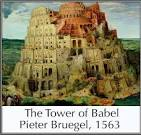
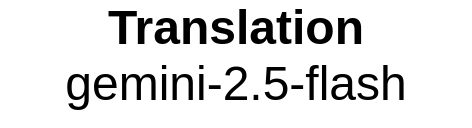
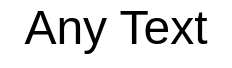
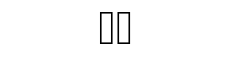
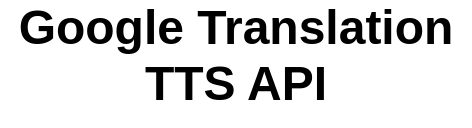
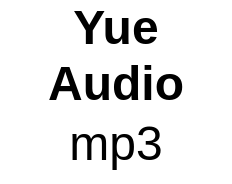
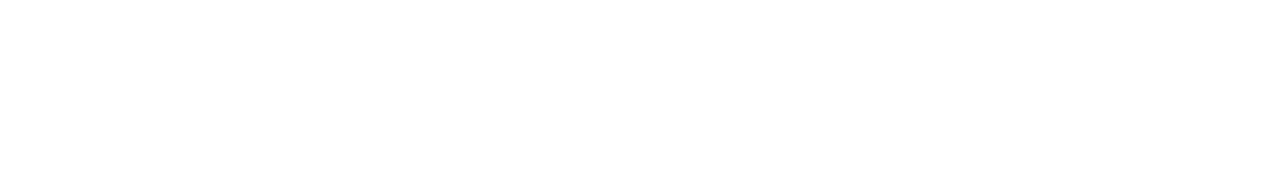

In [40]:
#@title &nbsp;
import os
import re
import requests
import subprocess
import tempfile
import IPython

from IPython.display import SVG, display
from PIL import Image

def display_drawio(drawio_filename_or_xml, format='svg', scale=1.0, page=1):
    ''' Display drawio format file in colab '''
    def system(cmd):
        result = subprocess.run(
            cmd, stdout = subprocess.PIPE, universal_newlines = True
        )
        return result.stdout

    if drawio_filename_or_xml.lower().startswith("http"):
        drawio_filename = tempfile.mktemp(suffix=".drawio")
        with open(drawio_filename, "wb") as f:
            f.write(requests.get(drawio_filename_or_xml).content)
    elif drawio_filename_or_xml.endswith(".drawio"):
        drawio_filename = drawio_filename_or_xml
    else:
        drawio_filename = tempfile.mktemp(suffix=".drawio")
        with open(drawio_filename, "w") as f:
            f.write(drawio_filename_or_xml)

    output_filename = drawio_filename + f".{format}"
    if len(system(['whereis', 'drawio'])) < 10:
        # print("Installing drawio desktop ...")
        os.system('apt -q -y install xvfb')
        os.system('wget -q https://github.com/jgraph/drawio-desktop/releases/download/v26.0.9/drawio-amd64-26.0.9.deb')
        os.system('dpkg -i drawio-amd64-26.0.9.deb')
        os.system('apt -y -f install')
        os.system('rm -f drawio-amd64-26.0.9.deb')
    cmd = f"xvfb-run drawio --no-sandbox -x -f {format} -p {page} -o {output_filename} {drawio_filename}"
    os.system(cmd)

    if format == 'svg':
        with open(output_filename, 'r') as f:
            svg_content = f.read()
        svg_content = re.sub(r'(<svg[^>]*>)', r'\1<g transform="scale({})">'.format(scale), svg_content, 1)
        svg_content = svg_content.replace('</svg>', '</g></svg>')
        display(IPython.display.HTML(svg_content))
    elif format == 'png':
        image = Image.open(output_filename)
        display(image.resize((int(image.width * scale), int(image.height * scale)), Image.BICUBIC))

    os.remove(output_filename)

display_drawio("""<mxfile host="app.diagrams.net" agent="Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36" version="28.0.6">
  <diagram name="Page-1" id="otFb0B7INwnK1uaRnU_D">
    <mxGraphModel dx="1204" dy="1749" grid="1" gridSize="10" guides="1" tooltips="1" connect="1" arrows="1" fold="1" page="1" pageScale="1" pageWidth="850" pageHeight="1100" math="0" shadow="0">
      <root>
        <mxCell id="0" />
        <mxCell id="1" parent="0" />
        <mxCell id="XZFBNJJKk0t1WFlKQowe-1" value="" style="shape=image;verticalLabelPosition=bottom;labelBackgroundColor=default;verticalAlign=top;aspect=fixed;imageAspect=0;image=data:image/png,iVBORw0KGgoAAAANSUhEUgAAAI0AAACHCAIAAACkp02UAAAAAXNSR0IArs4c6QAAAERlWElmTU0AKgAAAAgAAYdpAAQAAAABAAAAGgAAAAAAA6ABAAMAAAABAAEAAKACAAQAAAABAAAAjaADAAQAAAABAAAAhwAAAADoEHt1AABAAElEQVR4AUy9V4wsaXbnFxk2M9JEele+6tb1ts30dI+j1VAgRQ6E1RILriA96EUvAiRAoAQ97LMErHYXkB4EAoT0IAhaLiFqSQ6HS3LYGj+c7r63r7+3vEvvM0xGZEakfl9e7ko5PXWzqjIjv/iO+5//Oeer2H/5X/znRiLRarXNdGrqzdSEMV9K9syTJEkzdFVVeSJHS75Gi3kYLvWYtlzGpEiSecTUGI8oFkVR3NDCcL5YLKLlXF5KMTlcLpc8NwxjuQylKCZJvCsWkxRF0rjaMib782CxmEtajNfEFGk2n80CXm9xSXURysuFEYWKvAxCz/UdM5vxoyCSloquqUslmi+iBStb2vNZrpANXM+b2Llk2lBU33V0RZWlGNePxZZ6MhHGJNv3WKSmGnJkLIIwWsrZQrE/GGkJMwpjkRJTlXi4jMJ5wMtiy5CbU2VFjUWmtLCdUb5SOGteFeplVux6tmnEl8FiGUXcEVuzVGU+YsENh1JK0tmimKzw3TxaLtiypcJrwqUssV9KnP+HSykMQy7PjQfuTOwGG8pDXnLvf/9VijRN4/Kz2cwPPHU6nZqpVKlSzpcrI3uqsgJVRiCSrCAasddRxD0jMU1TuJ0wCLmBWEzh5wtWEXKXsri62DZejogWrD0mPpL/hDgjcRmWxj8Kl4yxYkmKJ5JcgX1HyjFFlvg08Xkxbx4qkiIvFkq0iKtKIq7K8hIJ2TNb0mRF56Nj4SwI/cCQ9Xhc7406yaSp5HNsnM6noVKLtBKTERU7wtYEYWAjaLY2aabSuXZrUCrX0Ih4Kl0uFw0zORw7qbRl2zZLVXiwFm6AxUYLGUXxPdcz6tubVs5SEoY799FFHVksENKSOxbv0VQ2aMn2LOVo6vPB3DeaKeSI7IQkZTOd8QMUE3nI3DX6LLZDUTVFWIIkxC39/4U0n89X14uxoHg8rvaHo2yxKCsattAbDGeLUFIVWVWCOdbhB0GwDCNVlc14Ip1MJow4uy/kJSlcyPfnXD2uJ7hQwkSUMiqAJcVYwjISgpZV3TBDIQ2kGq5EJbaAd3G3akzBMv9e6YShKaqiKZHHcmWWJ6nxRNzKpONJLcYOqFIozREyOj+37dlkEpuHRkxaW6tGQWBomirJs/HYdz2ZzVvMvfGQT3E8tzPo9sbDWeCj2AtZ3ti/+fzyWDdTO3vXpDAWzpcJXVr441RCjaIwms+k+YJtFHsgxwxFenPwnE3Ipc2Uobo+rmJppSyWWivX3t2UUEesfqVqqNzMnLFQ7i5YhAgjmM+5cRQae3Bc9GWGzHg9wltpqRyyO+8khIvhWu9MCgtXFPwTr8GlZTIZ1Uym05msauhJK2u5s7gkJVOpRNLsDgb+3EdWmiL8UoIXJEwEhTC4LnIQHm655DfpZMo0TTUmJ0zDNOOqqrCVrFN8vKKOJgth8mxBOJdCtmDOm7kAohXqg/UJdyn8QBQTjnQeLjBfoYqLKK5qqZRpJOKsfuKO5ouZHAvTiWy6XlPmwdJ1YnMvGo9G3XE8JqXihu0tuZQuq763KOyte57XG0gZ2drMJ4Io7PR75+32J49u/dlf/3W9kr22VVGM1DyUSrX1q6tGIpEQ/sGfhYGz9L1YFCBDNN/Nmn6gbxbz1b2diVAuPZsvoVsIAw3m/6tdJhRE3B7eLbWZWcwjlJgb4XqoO2LGjEaTqeMJvUcsYcQLhCtCwmwgzkeoJncvtharQhvxnjrv5oFBsv+qP194qAmqH8zdAMmE/jJSZ14oxZC5qqF5JlsgnLUibNn2Xa61chFIWsVHeIvZbOorUiwVmZES6Wj+MuQzUE9poSuJTCxExedLgsDSF3FJWsSkpe9PhDOU+BVeSkM23BY2HEkiNiwjaR7MHc/r21P0bxGtjEFZJHScnu0uZpI9CV07vpglotmkdeGrhmJl5Pkio6tJQwkweH8gB6idkzeXhpnB5jeKqUoxZXeO84llXHIPX3y+c+22M1+gY+Fs7MzGCkuJ5nJgL+yxM+454+HCDZZebGb7jaPXVj7lS+pCS4xiw4nj67qBf9PQLBXnxf4RSiK2/qp5iSt/d2tCEYUMlpqu4KKJrEK/wyVWHk4dHB+hiMCGtxC3jJxWhsVriPnuzMNEhYUtJN/11aSVMS1LN4xMrpDxWK+LtIi6qUxaEn5ITyRT+DXCD5uP7qNCfJ6Bo4ubyAmrmjkusQ5riwUzyZXjS2IINoOgCVOopheKsISEfHlJzAxkaU7Qnc9nK8NH+roiJ2I4eKFL6NhC1QzNMNAifCe3woVQStM0UiktbcRCu987bY0uT1XfsXThgGNLZx449tRLaPpSMbhCTME5ziV5oagLnJrrzfxQw6diRj/9/KcPP/zq2PFevvgioWmpfLl9dpS18v5sFvqe746DSX/uDENnxO1oWIYdLabB5dGitrUhZXKLZcwfy5OZjyJwfwRPtBe3B2gIcHUC+OgCgkgxNooNZ8tx58QRXAK+mQcr1uMa7gShxjSt059GqLAUA1yhsSAKlBeYg9/DpJRl5IOH/EBtdrrZYimVscx8wUhmcmbKIsJIS9t1MEvUHWfKx0TAG6H+MT2e0ONGkliVSCqyxl7zhI8kluGuvJnAcMJdr3QES9b1pAimfDzLWgaSENVMxgMubVYGtormgDs7kjSwEKrpeI4ipzAPbg9zlmTkJyuR1um1plNpqoWSM5gNu5E3IZQbsoyK59byaOkimC+1WKhE7nKmEWw0ySGKxRzsAeAX+At0UyFcAvikxbjdKKQSzz772Uef/NJgPA2LznQ0jmZu6I2RkOzbWjTT0ZiY4gdLIyb3+q35zE6XinND82U1qcWREeYD7CQG4QkIv3MB7kJd1tgHjIhvZl4AhkQ2bLnv+6Ak7AYowHYIeEEokpaaqcfYX4FFBHhGYMQIRAzuIdgDixyHW3BVK5vFdHTTxHS4vCwbiEHWVBxgwGauQhGLEPYhAQ0EpgSzBIA7H92RcZ35Qh7nPhmNgwBcPRORKcLcFS7GBy8CO8Z1QqzHlpBH5MhLQH+wXimzqjCQPHfhOjj8ZdyI66bhzSegXIVPYOvn3DzGJOwpm8n4Tn807hnBBKNKJjVl5i18/+yqUd+ooAoAtqSOpBXcfzKZZndGLjbmxM1EtpCZL0LCFZHw4b27V0fHZwdHv/obv/XP/qc/3t3Y6Q4nRy9fYrmZhFFIGSUsN6GG7hDf4nnYDeqI6U49d5pcBIGMMMNYIgVAQDooB3E3Ji9QJe6Y/zSsAHvhgb6qAVvOFrEG9BevwwbhNcgE2JgFnn0epNPZJeqDLHmw/StrwgEaqkasQbmBIYRJZe/2TSufG03tqeM0Or2J63hcS5ZB0dhKKmlWSkUcn+85wcxdxThd0cB9SQ3VjIGRABQSH2hlsiJs+vg02cDmQIY43OVSCz3f7i1Dezq81JVZFAzL+Xg+EyfOeJNeQpUtM85yBu32p3/1b2q18uXVOWBkOhyVC0XPdskE5jOfDY/r8qh7tVayJu0LPbT1hatH7LubygKDMpjrvbt3271+fW2dDIKIGxfbbc7m83TWqtRqzWanUqlaqVw+lSW/qVTqx0cn7UavVMi0r1oJpDoP07pq4pGn03wycXl0sPBmezvXXh8cTfGaslLd2S6tbyx1Q4mbI9tFbbGVXDFPWNB0LVcqkmOVKpWUQINaMEeC+EjibwzI4LoCxOKZWBvi4Ic44USC3CTJCokBARL0Z6ALpCdw9Opb/nEdezQcAJWUO48eWrksEQZX5YGWFGURxdC+0WhIFETFCZeEFzIE/iPmLWUtKXYmlwLmJVLEKdIdwj+2j0mNRhPA5xxLFKAnWgZeMO0q80kmIZtaWMzF43KQxFsBBka9lKGheONh353aVio5nzn1epVLvH79spixAA/Ny6uCZaUTcbZCWniaNM8l5GHzRPEn2bicMw1dkbJZi2VopCzLWFwxRBSSQa9GOmkBRmZu4HuBrsWjRZQyMws/NCRt2B+Vi1V36nBpnLiPJQ4H1Vwu8txhqzkd9GqlEmkqCwBU++TmujGZBUoSw8wtSZWTabIQAgwOQ2ArXA5gSJa9BcBn1mn3xuOxbTuu74kYgEEA7wg9xA6QFZ5yPveEZc3whL4vMnceRC3MR8QvjPIduJJjmlB0wSEQskT2iiFiEJJwWSFG4PuLkTPFiVnpJBdXQl/NpWqFfCpewtLlRC6eygB18Ju+76EdwWw+mUxmM3eOI1osNHAxIAMdAwdFc88fqfLMVGLIDWYiALuEdjDz2NFprxcYTjJhqQbhcEzIJrgMWqfzidO7OHYT/XQ82z99Xa1v5tIpoIKV1DIabmgpBwg7nU3qrjSX8JzjIZiw0x6SyE4G03jcxP20W40A3XT9Tqczn6Cifvu4eXh4/PDuw5OTs2SyNRwO8cf48cidqkEw6TaFN3BdJNRtdbvNFvu1la1aWSOfTuuOiyPSBXYLZdgBNUqncnwroDLuSlVnC9DyDDsA/vIqRaSG7D9uSUJxCAOgcixKxCXykBUq5zmGJUUrLMI+Cr4iAkiBevF1APYVEBPpMqSBSiKAqGCIkBB+ayH0T9gDSAFztO05WaCST6VT8WI2IxJ2I7uQtF6vd3F+FngzK5PDFYeBN+p1Sa0M0iwT9dcNDSgY4NN1ZWHEfGnuzN2Rv9QD1wENzf1ZyaqF/pCMOJ+zSFo8r+3PJs3Lk3Rc3blz81/+739kGsl/+B/94+/9xfcqtTWCbDKTiBuxbFqdTXp66M28mB0p7mRSylZGk6FlWYoah7TgfhOyIYOUU4K5ieWhNuSkmYwlY2PbOZPOJ7ZHkDg9f1Utl+3peGe9vnAmhbVyykgQwAJfpIwoWqPtotildfnN4VlxfS2WSHhTO5r5ifQC48VaR9OJqcXZUTAfUAHMC4cjXF0YEwwKXnFlOqs8EvAgaZoAPUIcq6D+LrfhOakqP2QPsSUApEhOZng/VCxchavIF1FeUtkykEVWzoSK1rfdd/nXyqviYheJdBzHW6+WzLi+8B0UoNfuEYBGo9F03ENPNI0AH08klJxlCnkL9wusgivCz4MqxlrowLQJhZgHMr5dgU00QGnKUq+U19EsQBHeOJfLZrOZk6M3xVwlGHSu3gw1Zaj95jgatjvOEGQqqbGEqZRL1t5mNZM2Vh8kCBWiNLeeTmZUXTs4OCqWy8BTfIXwKdxtEOLV4E0I7oVcYW19EwBqZrP6aJjJJE0tZqW0IKOX8+buxtZgMDo5Pe9MnEq1XlmvXDTaP/3i2c7OjqEml4p2eHjmBiFKnSoU4ylrY3t/c3efTIm0YQEoxtHoKRlsqC2I/8A2xOSL4ENCgoNcGnoCJuudnJDHOzlhYCQ8AD4dSlN8I5g2AfYJZcIo0TGJwBNGijrzPSw6kUr6y5jaGy5DH6pN1/R+t2OlzVyuurOztblRgdfDvcw8u9vussq4rq5Vi+wRu4uLg4viOcgamybq4+0i/MMSGhTaaSZruALhxkXiK7K2yLYDM7H0J9PxdJKxLMGmiLvFyUuGvOw3Lv/Rdx45Y9dc+tfqhcZVE8Hi6BOxuDx3c8Ay1o/eEoh0DROIp5JogO15UBExQ2sPuyQP+Ht/EbkLP1crI61Op2eVy6qZIGiwJpL3Xr+zVsyNB61izixm4henb0gwAt+5vJqs7UT3P/ww3+y+fPH69LyFyEmexv2BID/xYlGIx9bnyxtbWxCOEEHgLrCJmUg7iq8LQg7fREoFf0Z0ARmviLsVOSBcH5YmDAYoD3G6HA2Huory6IiQV7JF/JyYyLdAgb+H2eg1oYILm4LeisV1DdCJsEkz19bWNtaqN3Y3C/ksTJdgoFMmBGy1ktfNNKIVAZIXh+SHmHzoOEMDI5Eiz3MEVFUkD+DvTBJEgKXwyK7rLhf81tdVbTJxjbjXHwymrmNaOag3z3Pj6fRWJlNP5VLLGKRG57KFP80ZytGgw9XWdzayJctbeFNg36CXjKulnMXno13FUm0Ueo9ffnnn/j0s96B1UV/fJDUYTca93uDWrVvB1H1y+HKZNA4uz+Bp4CrNtKksZDOpxmNR3ooXcubV6VtDr+JaBceiqbliKZGvpKzSyauDwzdvcQNJFbQezkPf70sknRnFSMdQD2hHwSUkSGvwnLM5ohFbCNcA5FqlQ+w+0JlQgBauQhQvF8BZ/HwZ5rMZtldIhW/YU/ErFfvkOa8nsAExfIIYguUNK3Y5pmuyGcDtQAbNv/Wtr2+ureUycW886vf7lqmbumbGYlvpLDhO4BXPgVtE18jiqICIzDcJ7oiZpr6MYInIm+axmbKEmFoG7lIC1C0TIuPVNOhAEyHlcrlMLosqabNZeWsLZbL7g1l/6Njjf/4//zgKpH/y+6V8zqwUM/AElZxVrdU7vfbC8TtXnWKpUMqKSPvFk6f3H2lT2/2Lv3p18+69dqf55YvnYNNabW1qT07PjtbX6yhMs+HevuVi1sDxRw/u4lv29q/PRt102rzqdNjYytY10rjeGCwhEcPeHB6ICsdcgm99/vjNaDCaDGx8k5lKFlIZd0rS50E/krTaCzJowDJoW0Yd84UskJwHovp3wIFNdxegD5Ek4dnEbwRnAYpQrHhKkE6C8SMVC0hzBLUmS2Y6zdtJz8EKWrhQrVwesg+0BgMWzkbjbou387yeS2jhNHT9VAJiPQuBwLoV2QgE5qboIOczaWAYGSgYEdiITQw8Cj+UI2ahOwWMWXFl6jvdVhOyJ5VKbazXQR9r9TrLhezOZqv8EGnBe9Yr+clkzD2Ui9lpOLtaurVNabOmvTp5Wa9sfPS1r+Ysq9lod85blCpevnw7nk4z8eJoMK+trYVzfdifVau1vCXl04XOVferD94DCsejZXIp/otNJ163v2FJL376uFiCk7WGzQaE9cuXz8nJ7Fk6n68vUoX+kJQzFxn+wBnHlPjx4esPP374+c+ffPLo1ykFsLOdsVSo6KlU5vvff7q5Wzg5vQDxLpMqZSj4+FjGcvypmU9NXRulh/lCDBgW6QkyWZFJouSCLwRpsyigIJAD5mAwDvgGU0EqkhynGidMjTQ4ElBcJVnVAnJmUVbiRYaulUvFtWoZ3Iwwc4W8ST2FTI6MH3sTNKi4PoCFN4qPwkIxU5iSKFwQNJdR0rI0eECw6zJYOom4vPBHnhzOSwAEsizAsmnOZmYmk8J34z+Gwy6FJJz9ZDzRVSWftYBbC382HA9393d/9/csyLZsIgt5qS+1k7OLYW94enqKLwHgaoYKJRbM4CC8lJnOptJwxjev7cD9ULiSwwWZJxnrWiGnbG8VSCeLOWN/gywqbiYvGl3ykQgzjwRlTWl0sZyM4IRDKgfJdLYiKa/73R7UV+RPc2lifIg+EX3zackwE6RPcVPqdfulWv30/KK8rUsgo2Q80IDgKHBI0YDSDobCjondxzepBv9OJqK+hSMUoWtFuPJbNi6RyuLmeMoPFwQGkWMBzCPPmYEBiRgQeI5tqwBAfBiovFapBsFNSh2wHvV6nQR39Z6VhASxizMlWSQjwwoFMwxQEWIMxaUpFZJzs0wER0YqQchGM29KHSCol8sWDPYKeqKAKyGFfAsA4Xk+n+fru99eXV2RHjx67/3Hn30O+ZWxCoVM4eLs8s7+7b3dG4N+P/XZ4267HbdtACpSR/Eo3X7y0XvlYoHgV/vmJ+x70UqVYR0sazDoAfG1SgFeDtajmKFckyEPLWRSrBksqIiy0CKcuZMpRY/h+Wn/tfmCXBBfRxm3XCmChjbWa+PhiPyThHZFU88Ux65Wi7gWOO/Ly8u9ew89N2AnQGtEDUFN+TN2XVQ/UQdBEhHTAXBYF0WMVY0N/C2KnVgRe8gX1F4AQmFQvIsfUDKAWRKIb8WlixKqDI5g2fC8Ib62jF+AO09QYskBZ+GAybG4pigMct0VcMBJcnsi+YISxnRDSj4LjHjmzdAgGCA5DGK+rYeuMidT5pFSIPgWCzhA5EF2iVpgXvxkMBhsbm6irSTwZKOYy/X9/atWW3DkMRnymXTs9t27uXTh6ODw1dOXJAMkejWrinT3ru0UK2Wyvl7jvHl+Yk/G5XL57OzEtZ21WsWDn7fHeH1uajwZWdTZYgsZgm0yyJo5bx7zY1gAGFKhHkRpA/y+v7vV6fQRxvsPb965uR0u3V7v/Nb1u72BAshqdVsUpqb9idrrZbJp5ISSAlZz+Xw/aEPIE5/jRoJ+BWwdr8NWiOoGJQAwLKFIVglaMMurECVQ9yokCXsiNZ6DFviBKGustpUotoRhgvTDH2FHPEIVTwVbhwwm43EQzc2kSQwY9gfsKShl5SoRrCDuV4kbSij8p7Bg1oOgFhDDAmNqWhw8gZwiP4wCkqUZbrNQyOFpMSOkKzRA17vdLhqwvb2NkFaZjY9lAEaQVqFQAGTi6Og3uGp8sVBiZ5fNcq50ddk+PT5rdjq7eztrtTpbhKSJubx9MujUcumD56dQWHHcdTJJCl3OWiSN4x4Zu0M8SeqxfDoeV6hFLtOmBp2N/8YBqJERacu5QnEvwGf5zmQ6tEEmsdAfD/ozf3x2elwq1Ne234/p8mXLyxZhX5VULl0qVwlAsAGE27OzMzUpzBeMC8qljopYeGBDbHwEgyqCksiFhGWxa4IJEvCPu2Cr2FXkIZwej9Veq8rqCopIeJEcZeIIGYI6iFWAbEIMUsNCAM3YK+iZbPSdg+WSlH9xKSvUT3QzhHhwlNAPcMRU5Sl+EOEMUewQzIevLGLz0bTnzsZp1ZyhSEgpIJcSdWGhMqIUkqjVapVKBSGxQtwFnhYr6XT7VPEp0FPgWl/b7LV6P/zZz148eQkBXylkRdEraZJIeDOHGMsFMobaOnn75LPXD+7tOFaWwAAVsaDvI/JSpFCLeQLVkRLEGlIOPBh6vCor07ew6m4gMEC8oZgKrph9lDqd6WL+MmXeq1TzXrmCnxwMh1SH1DjJPSKl5JigvLC5vUOh9qefP/6zP//Xv/pbv1Pf2z8f9NG2tJWmF0NcldquKCStHsKZSYlUQpiMEA3Rh2wST8e/8IVx/mF34b0xr3fULYKJUZRlTeKnonQsIhVQjl4GVBIJYUY4RiuVJgYJ/yhELeAC8ZCt0Qirms5FRelToxgp6yxGjbhZEfv42HCOGcIaYYFzHxKU9gefYj0/hG2DSwPB4+tFcR3qcLG8ajYQD1zx1LHPLs5fvXrz27/5nfWt7TcHR//HH/2r6WAyn5F7SZQDQfqwjnKjgctdCLrOJ6+OTANbx8Ohs6J4Mo8sq+A6PhpD60MmnU+aOrcA4Yz7pQoFQ0ugFBVMINhqY6gkk00aJtxShtJbu0lW601db9nth5LuBotKwshDV1yejBwcsVRNGL3RMInDyxXxEz/4wQ9uPny/uL1NyRuFJAm2koiUjcP1gdnYQHac9FvEGKEbwvlQv8RscUoqQhMQTbxKfMEPitKTCG5L2ESFYklISGMzV0aHiWFa3Jvg1meiTYk8nwsIOyW2UUuHwYpRsY/juKj28noghVAaAqOkU8CIaTqwBDmBSUB6JnQcfmhmwPkPOsNspsg1uTKbyzV5GYnXu/jUbre/9a1vYUyYGlZ1fn4uG1q33xuMIVTHOK1Xr6aGJt3Y0/hJs91GRJvrdXiSQi4r7HkRZmjuQBayMQ/l4dDBcw4HPStXotXFslJ0dNBP4gejeiY3C4KEmZrNSdFlEjl2nRtY0uYmKTgIezrbura/fW0fABKF/vODo1vX9z/46BtmoZb68qkTSI4vvf/VvX/4u797cdFk34+OTvDzvYv21dXlWrtllspZw5ittgXbwELAXAIg47HAEapKJ4JQY/4RCrVCZ0IwwgwQpaj5ruITz1c/Fl+QsnCSq9YlUUPE4xEe4LwRzzsbEpJTqEuirOg9/6AgfIoMPQzOJF0XF0ATREeXuEkgSjplDUfdMsYx7UK02wqsUQQRC8MIXgL7mbEUadmYOtRkXKpW+I/n61ubfAusIN7cuH3r5u27tHoYGfOTb3ydR6lQHnS6P/70h29fvX5w504pm8flY/fVcom+ml6nO7Od0/PG1JamdjB8fcz2nF6293Z2v/jy9atXr2/dvnbz+p4fhEN7Nn75mi4wgsPRVTOmJjIZzLjyl3/ztxAAxXINbPS3nz5DW8yE8YsXk//0H3xw59GHhq5/+eZw77ZRWq/kq2Y5YezuX8sUcmuy9otffJZIp46PL8cTaToeUp+jYj5xpoqodGqi+q4ZeG/HmyMhYJhDS6EeR6kFw4cfYi+xIr5QQprPxe6+QxBY2UpMRDTh8aIFu4dtEP9XTQn/9te8mvcLGSIg3sCLhUAEvP/7C4j8S7hd9ITsVnwVpXmhCkjUNFO6rlLNpb6FPolmFgCrqgKaMSOi7tHREWhie3sb9E/EWl9fJ1DxhNWI2IZO4BbpakLrHRHXUukkS7hx+2bWyqyVKvvb275jNy/Op+MRVWSYxHaz8/LFm93rpa2t/acvnlMFX1/frK/vnV/+hBaCxVKdOAHLhb4UrI1ueIvoX/3JIfZ3+25hsXj5+m2XvcsOZp3eaDCTbpVKr99cZlOSt5SMpby2tjmx7TdHh2eNs2KtdPv+vWvXb9Di+Oz1C5JOKm3ZXLI7dg7fHhCAQ9cZ93vZYoHMFKdCCEXRSXhVnQRLCQ1tFWhWQmAz2fB3wV9emvjJ1U+Ej1w94wuVDKQocAAB7F1bhRDd6rESD4JCNqA78SO+Cgmt/hNQgXeRi4kYuBLvSlq8nmsKnK/QSku7S2RPpovIJuZhddR10XE0AtB8cnLy+PHj3d3dvb09vBwLBeARDYFMCAn5sSDu67LZArEIMyYogSYVCVgMFD44egtFSBiAId9aW88kkl8++eLp4yejsQNld3HVQn+Tyexw7LY6Q75eNWDZhX+JJ1QayjK6qZB2rZTaDSQzY11cdOkGyeTKuWLBtAYx7YTuvmLdvDhz04VCo9nZuWGO3F4yb1KoVTAZ+t+oSabSnV6XzotlEIGDOr1j0j5YGHybFpPi1CyIE9RaCf4x2ZvPp+6AUiD7nkhn6bcKRYkbpV/tOOLCR/3b/X/3BCnwY+GRwc4rmwPnINYVKBR2I37NV16HDfGNkIeAke/sSlQtBRohpSLDFdIUNUyecU0hOJ7gAakIe85w2Jf9QU6fm3Ejb2VYIr8F1yGMjY0NYB5PiMClUuldTCJWVavV/w+eSpQWbZ2AT/OQjKS1QtEChqxTLhqM+NBsBpJCPTk+fvHlU3Ti5vUb7Np4PC3mSxvrO81mk2oCToYILBRJioFfRsMR16QVsJBK3bwjXbUkPg4RzoJFkdYFM/Nweyemx4y4ktNy1bVKs93KF4p/+mff1ZPGV77+XrFaSi4W1K3cuWeqWXCEQzdhb0TZjHtvXbUbVxe5SoX6CkXy2ExH5+LJFHjanUsj0mCo9ExmOIXjBAag6khBYHQ2U2ypINRXOygsQuwjvxUMH/8QWPg9L4gWyu0HN0qlYqVaS4pGMNFphNNbRbDVVzJYIX7BTYn/hOWsPB6+kV+sLo118hyJUQcKA9ce0Qw0shL0Ci0obENc0q87olM1CDCmnd1dzGsynfIVQMK7prZdKpeRFikw0T2by/h0TkzHwnmKtnXgfsrUjZPDQ9oO16o1iIVpf/j25avLs7O1an3QG2azOXtiE664P52e7DB89vRLKlb0LMMRUAeauVOiLbQFKI1e50XoclWRpV0OAdCO4+7fuKYn1E73an2jMhj26tXa559/PhxOzi8auUoanSlUSpl8jmb07rD/45/8zEwkB73BoE8PqWif3d3fpmGrWC7Z4zFoGBhHDjAcjojgqDVpglBumCghBr6KjRMSAnWKhnARNsR/ooIoNhHATeVpxdUhQQgE1wY6CKNaJV9CmCt7ElYjbAtRimSai6LFQhD8lkI9gZHXgQaVdykITTGrH0RwJzQYq2jTLBgC0oJx33U1CLR3nVD/Dq3wbi6CuwA+EKswL3AgZASBKpdPxzTwSJuafhywLMWA9MpSm7DRqlzKUwUsXx2enL09uLq4PHrTOT/u0ICuAbxkOCSvcXHOC5Au3cdr1TRTCIRJU0+mSoV0Jk5JGjB+7+5Nund8X6lVt3vdaXcwovbR7TQhcs3Ejb/+m083Nys/+vGPmU+olmpKXCZXUxNr2AAkOM2INDoij1F3RBZFpk5jIz7u8O1rq5DLZC3qKImMNZhO6YKire7mg4eVrZ3JfA6kF1suXJtwbGKfMSm2nm3GHP5+d8XPRV+YgBcimXv3EJw88YAfvXtwJayFtwhjEkkTVkSaJOTOZcU7Eb8Q1UotxHuE/FfvXWmKEO+SvQb2z0TzhShEzYPE0HYzVg76CNaH+gh2A9J6F59A6lyCVwI0RD5kGALx0zkrQTJpoOqkblI6YLfJaUAcwNqLs9Mf/T+feoPxzsbmh+9dNxMJ+qSgw8rVEkQigJiOMJiO/Z3azt7WzJ+k0kbGojY4XdITxVDHVE7mFJpqVTJp09xYq789eIU/ev7k89/a/rbrShvruUG/nU6Rjclf+fDR09cvcSjgt1anQ06fDHO1qsBBn3cf47q594Du7Jh0enwCoXV6eTHotAfnIJF0o9ujz432LyqtVGRJbWGwV3slLIrd5MG3yIxkNEYsE/nWu71c+UBKhKqGtfAKYh9yINsUZa6VK2e7RWcy2y38m7BL3hnCNfEPcsZX8gUz5zPQdB5cQfwDFlzVtvAnLl3g9BXT6qYoMJpk+iA4Wgno8CXnSuiJej1dLBbJk0h0kBxvRLSpZLKQz8PMOh5RJMs7+OFysaQjWpcN3kV4a7tNPamacZMCSm88TacmNDFSU3T7Ng5zqSWE6UtyOqfBIJxdNLv9djwhb22uKXIW+cBlIXU9myClKuZzspzR9Xx4T3ny5FUW1QyBjhcLeXb/0e3BaERLzIOHH04ngbeMhhftSRils+lH77+Hxp5fHsExbW9vfN4apDOWG/NF66asdjudo5PDGYyfrIPdl/ksfpdee3JUBAyAmeF9xBJFpGd3V6otNpGsRwBntlsYm/jxandX+4uV8MBwMMVYQFsXSASPBfCPJq5LQODVxC/oU6q24j/6wqSITlJaw5gcWVGtcxDPJPS5l5FPhWfo+OOp3UtbABM3nlTG7nhC293cJwUm02RwZWXhciKVpp+k3x9CTV3b3W9etXJW3rMdGubTZpJGsWHHNeMlTcrM6RnX00RQapCnJxdEAj+UfvDTz7549bY59d62+q6SIGE5GUxa3vxq4jw/uegDDHQj0BSbbmURhvH08WVkhHNaR3PyPNm9nDJXA1h2pjaVlGqp9Gu/9NVEnLKONPOn8aTenfSccKbmzKY71qrFZTarpqqXLfey0T89P9H0KJ2hmUqMZDF/NZzMxjawLnl0eP7kF0/k0HeHPXoFLl4980ddNQoax8dJQCzUCH2ppLM0Xi5VnTYzwDaocE5thv5Z0lGafuFvKVppumBfGb0giecnos6AvwFrKPdu3ykUS+kcEDUDxYrf4ZW03VAnppcMdSC8iVQXga9YD492GEEWE7yEuHG7wqaYKYNHMwCmYa915kwGsJ9UysBSNAHw6mKh2Gl30SfgO72bdHpwjUaj8S4LJ3sXZMTpGTZM4kkFG+L15z/7u53NHcq2vW6PwtbBm4Oz84u3bw5tJmfU+NrWNhpwcnn55rhBqkX9Xk6IXon+aPDs1fG9B9vU67hpXDsb6tNiBA8gspGwulmDN6KC/dkvHrvO7PDkqFTKlsqF+dJz/MlwOjSwOCuPX5wvlbETHBxeourJTFyjbcof9/ptqOTp2EOH+wNwKY6Dujm4VHbsAV30BegZoASduTTY6PEHH3wlwsvS3ErjKa7snQEAu2WZ3kW6cXzRHbRKU3Fywk+xnQI5w2cIzwYopTne8+jnxkBJknUrV1jGZZ0uyXABgcSF8PtED5wbYR+TF7X0EOoljm8U/hTp8Aw7BfDhZynAi0Ei6gkTZzBK0hEZRu1G00hYuFP8GBEIG/WAFrEqksXpUct49OABRQ0iEyW8509frIfR3fuPQIAsttvt8B/6cXZyWq/UJg4F7kXKSoNTGpdtjQ5n2+2P+7u3qnRnNq8a6FXRyu1sbx1enNihd/3BDYAy0RUgElfToFvuMp5Lvj05org9d+XPvnz83qOP6DGFh75snuIAzLyKq8rmShBN58dvoxgdtcAD5huXkOnnJzQgqCalQjlRKVvt8+OFP6eBczTuw7JlkprtSlv1xMbapjtx3DmEPDN3Hp2kPCOD8WmPhKBi71fBiR2jKVzMK1JIA2ULyM5v8YpCNlgQ00Rs7sIXdQ3gsQoDTdfKeDJpddpz3gcCR6DYFF15XAoOHechLBOfJ+lL6AMabIRivot63AMUI1xzwkAwjiARjISSSGLFYJGJPWYIhuwSBIGoWAPsFOCE4NlqNJEWWw/So1GC4MT6EN7l5cXp+RlVyq2tLcId6W3CMG3P2dhaLxcr7UabT04kT7aubeM8rUoOvPXmzauh0/+Vj3757q3btORFcWkRj867VzRFwVngFvLZHJ3h9BbkXKu+TZW/OB3Odva2jaRZT6VbrQYlkkwW44f20Ull46nsdOQ32iNVSnj2FBXR44ut3SJcItpL8kRvyHgyLJWtRDzLIuOGlMpo9Mqu18rsXX88uupPE1Pb8IKJPVnG0/SfKvEUuTAmha1w4wQi+BoG4iCchAmh9yJXBVmv8iqkuJhjg9QCERB8mwq2pwOHUE1tEJzGkMrYHoMFofQZVqUIyEXJdXjLalqEDhFdCFx0JQH46MygOoN7pDBq91rtae8KYMVCGLaJi8o9GSpgJuq0m9QUqDIsTUZo6PoTBVn4CC7Ft7CLXO3a9X2QOvu5Vquu8mJ0c+3i4my9vn5xcUF1vbxWfvXmdeOqRa+JPbfH3nhjc+3hV+5+c/H1DGFvSMufmiklb72/+9nPj+l0joOwIqmQo1XIorg5Df1oZoftJs0Ggb9sD/t9wssCit0ifwKO2d54OnamicnO5o1CuvLDH//i7cFRPF26GI1nAYWbkMlDIgztI5aVXyz8jfVNCgL5Alw8dYTASGTd8dD3xo3+dCayTtoX7eF4UCuSXpeagxFbJvJW9mMFm3lG1wlwknSJFjdIM1Iegc34PqbQmAoTgWAxArRZZeCUsjO0FUT4kvYnM6H4zDjQHiEyYxohVnYjXCPjsTwI+PxE6APGiQOhFZ2pBRrBFk672Rh3LkoWcRv1dbKlQjaLftBCG29dNWAi2H3AHoERkJ0FLycSvA5LoqoLjwDdx2/fHBzcvXsXw+r22pub6xglroZ+I6tcKVWKlDUPz46c6aw7GvizgLZiPWUcvnrDFayShV42Lq/yteI3fg2HlaeITsmWD6Uo1Wq17GBONzbl+qt2m77P06vJ5loWZi9TyBim0e22HHdKFOu3+8N2t1SuJ1HWoX3y1lbT0qMHm7/0yx8Vy6mT04Pjo9Ph4Bw6amoPzs96adGKaqUzejqb7dACTZkhLt25fi0WN7tT9/j8ME6MzdDJrkG44tbAU2ygQNtiZEgDE4r9xC+JjV5xCyIvXSQzSUqmZBq8Dheq5kvFiT198vnPf/HyaaTH1na2kPLW+katXAFN0gsmZAMXz7SMGONg1/GIeF0xCo+8aRpczmdMz/SbfZhghiPKFcsZMEoUFUpF0XQeLQk+Jwdvc9kMQockIyzhVamREDzgeCZje0VCyTxHWzqt1meuW6mUyFtJtuD6uKVMLnN2cZqkhA/pJ0djT5pe9RIJ6aJ5yYfevnsLjWv32twOA+GpbI5Wuna3B5lbyObWSuVcKlvb2MZZwz6YaTFiHHgLii618trZ2QWm3x/2qLqwjHKxyNaMerS2ZyCVi6B3ujtyVr1Swm9OhiGjrdsb27RwUdA5Ob5iz7EaiPsIGjITs3KZi5NGdyLdK1qLmOoNB3/zt3/15uI8To8iAYQkmYiAH6OrUowg4m1E36ywMpGwvhukYrMxANAZIJzESXGmWOmU/nLJX/i9Qd9e+iPfPbw6PTo5phOxmM2lk2YOPRG8upjIhFJCtuPxBDdFrlrMFyxSfFELnQNJy7l04Dkp3GJcH5O6et50Zo+HNOnR8BPHCtHr0XBClLq8vISDuHn9OvaUNNOHh4dIHGMiSPC4du3aj370owcP7vF6x5kS2BASQxvCQ6qx67eu09VEmxVNKUJPVo1zgP5Wo10slik8g/Bg6n/1V3/dSmevzi/wKMC3UR/SoedhL7h0I3br9o1lbPbBxx+OB+Pryf3HX3yh6Cr8Am1G8DvkbYHj0zggegec4PYHDyjQwhE1WscM5WxtreMncSTa9QSrvX9/AzVqXF3AysD/QVQ+f9Zo9ClWzYSLlBZv3r44Jv913ermdjqXpwWxVK+mMplYIJr9COcGyo81iSSWf9BCkdUKE1KBgqSgAakWKb/qzhyePX76OFW0AgVYElBZoYJ7cXVO618CuB+LkXvTA8PgARwdsgIOYKgU/iR6061MIZ2S5u5X7t/51tfeS2ZSzszhGIG4aZD4AB3RYnc6oUl9OqJgaNHjtF6vb29vE2bkgtrt9iim0/ZDNH5XfR/0ex99+BVAIA8q6yBmaAsUBbwEBHI9/zd/+z94/vwl41ZYG483r96ieHg5f0GVbtnut3OpXPui/aODn/zB//JdovSt67nf//3/ZtCd/O1ffa/Va3J4Baj15s2bpO96UmMIsLZZ/flPfh5XSO2so8OLbMYEsFyeX+ztbv3w56+Ho97dDz7s9Y3BkO6oNK1jVDHIGba3d29z6VwOsFqu0imTevHy6dSZ7N4ovfdxmWBAZ6PIiYg8SsRgRODSsUGr/eLLp59BvdOCCM2B6tBniY/BvOC4MIBKrUrRB8fjurNUirY0YzJ2djb21FTapDOcKd9qtZypFCXSLNHXGdijMXMm+DcAuuulcIaI2vED0IWIOLqOicw9N4kBCemyMJ/cDAgq+DidcUtkGtC2jluIPFHOxyuPBkPoCSzjiy++YCQWqwqCOVkUmoVU4J7Pzy83N+rPn+PN6MWcAF/4unvtGlLEsDTt9P69h9///l9rWgIMgvZ0W20cfzad0pQ4wyNcB/dBgtfrDFuNrmtL5YJw+gQqWnaADWgnqJNcSpBrnCzCaIM/nQUeHAFJ2OVZ/+2J9OCai0KgUt1OSzek4aA1Zp7OYLStzHCsMOJIKpWL3oz8TM5kIIZyxXKWwrSgVzAiwJlp0J87GPK/CWC5kLfo5jk6O9++fv3mte1CwUJ0tLnzQtYcuD61b5yWIMcZ6zBirgcHHdDv5zpTAhg77perKmXmjd0N1IHRB5q87fGMpWB65NGwSoz2UVWi/CP6CBSFmUJ+hDvlNmcciMDK6AILPIAUk8xROCPJWWpMGM5hnRku5aKw8oBsXCgzgW/eHFRra6VSBezy+vVr6jfoBA9Suna3j2O7uDhLJL4u/Fir9Qd/8L/9i3/x3+OvMBpsGnSOYcHe/uV3/2Jraw8FQkNgm/75//AHv/zNB9/+9m8QypFJykjhtaBa6HcjBND8y8EcE/ytFzQuXTMlaRmmHBgwSaAE1KVwTdzX7tR59vjl+k5JUbq6qb0+PHr08O7EmZhpialVWvyyXD2V5bgNjkYhK68UC3H6wAyDPp5ev8moeavdIKiUq1Va1wulcrTszlst8utUNlXNWyCp46PDXCpRtEQCJkhyOIS4AePF+AP3xT2Sw4B1oZRx+AQESl0Uf2mn5SMYlSdNhuHGc2bIExnsY5YIXQYp0OFO060gicipyBqI4PgXOsdXB5KIvHm5EENR6WJal+d2yUro5Oyku9QGGYJcOANYoEwq6Qyn3A9L4cF16P+hmRKMh77gzfCgmBf7y1fMnPUReJ49e1arVb/xjY8I8lTEs9k8/S2wq3t7exRKv/3rv0Eo4pqQZ8C5//q/+s+qlXIhXxQRyBYNaNgZaQSaB9pHz8QYVuCk0wlZpTxIxQ2MykEhNgOc0Im4/RUFo3z8za9D5927/4hWFm86LlYrTPK/vTqziiVSfN9ncEFezA38NhcUM866Uq4UsINGo2nGBOUvOpEyFskmDpzVenRo0Ee4tPudJuWoYiZF79n50UGCqM5c4lJ2J16/3ex3+2JbdMIutV+dHhLQrO/ZW1s7gFLOh8BbkRMp2ze2KBH9zad/M4eXJskVY8gM047JdWjrEY1UgtRxETVf6aznQabijAbOZAwlHlckgzKlOy2lk9Vcxh0NUpqcTccXnsv4LiQwI/jUhM7PzkETN/Zv1NfWQCLjyfThw0f4LjLtdrvLHCkoi8SWhhbwCk6SROprX/u649oUY/q9PjOmb1+/xYdsrm9hQ9ub2xg0U9Z0VdarVVwrt0euUSwX06kkl2fqiHrEweF52qLvWXn46H6hmPviyY+TaXYpvbOzk7VSpP8UD9Hj4WRy2WhBDrx6efDovQ8zFmC9NXVHnMBCp2smXxCdUsBdRjMZvhNTm8gMUD6l8NjptL/44jE+udXi+J50qVSlv2tMl363w9Yz4II2Y/rgHTgssGu300Z1YJrANDgVLkXwxjOwnlyeLi+cl4qpM+uHwrEnjKBxc8VCSXg2gBsRO1srQZQIJkhh9NNjkplGGUIXrjmg/K3J5MLx0ABHCMugxLeYM5mvQUSPJ3a/G8tiOkOG/UacE+FN+q0mEyfElVu37qFU6DhbjwGJbkaMXRLFaZQac+FBiOJbCvBYCfP4TK7hQ/7kT/7v69f30dy1tfWDgzelQvHVi5f37tz/kz/5vx49eI+SIwiFEcNGu0HWQajjOhwYxdomLo1KKeC7btI4xfEytKmOyXVVU4IdAZIluCtFwf/QHE3mRx2FCcgf/ezxnAEqM0ke2aXG5/YLpXsws0v6myNigc48JiQWDhMNwALCuW87k+OTw9PTcTwxZnNxEnzuggNoOACJjulKibMbqCZiJZDcVIEhG9F1CwKIjrpwmbTMrJUs5QSiJsoAzwHejKIRd/g41FccnwH+BFREC3U6GcNg4BJZvLsIGDKFIWAREGJi7MlQgRhyKMfNeNrKspuC/zMZBpUMJUYmVrFSHMdAixHNjGlV45SDfMrk6A+Njq00T5gr8ELoJhoiwujg4IA7IXNDDE+fPiWrTaYsFkXU4SafPXtB7vDJJ5/kchaFj3/6z/72f/3De5RFOUGESiD9l9Mx+tAb9PqNi8tb12+CGYa9/h//6b98+PA+78oXCygEeKTTDUbTbsyI0gUpmYtb2dRw2pX1KFdKR13R8O9CDPa7bqDTjokbJ9KUq5X3Poh7bnTRbNKEsrG7vbu3xojU0eURQB9NpW0AF4kvASOwM1g5JkJxsljM/3vfrnIIkUh45DglR64PIEYRmLSGJeE5Xt3mCAvPpWWFOALsojwnSrPMjnlgVNFfxVAScGbhCNc1pPHfcSvlNaaT6FAm2EOkirwB7cB1wACV0llKPv0hnHAjnUrhCsQxRuKcgwCQHyXh/5jjWyzwmiBCoJWmpLgYijCZELkWtVLBMq1kinJGOm3BJqQzI8YhmJPC9VIt7A0HgF8W/vLlayqHeaCPlSae01KBbC4vT/Hyv/d7v/uDH35aLhT/u//23//8889Y21qdAQVhYXQ9/OAHP8LkLi4azGgSD3q9Pl/p0Xz6/BkRrlap40ujGIecDFa5mZXIFFK5ghtJWc3YuXUnX7XjEkMEaZiK2dj15jYUMgR0tZrKZmr93rTRvCiVCkwbQuFNbW9v/9ZVs0VDNrEdN4ADWHVKiZHZQq6I62GgYL1Wp/+LsRamKqAzSQST0HKrDsakACuWSMkGONcRTDzT/OPeSGaESVbssXt0cvLhR1/hQJd+b3TVuIRkEv1AGoEw8mwUhiMEHGYzCTnK5s0tKOhWp0UydXl50m1d+d6IqkcetJuKs49pLEbV0UE6AqZjoO28eXXZ77SYxaQ0xdRn5/yUUGaqymLmUMq8ODuHeD07v6K57+Wbw8PTC5CNlS+eXlz+0//x081t3Gzx4PCg3WkXysVcPttsNTY26v1+5/LqHLXYv7ZB4TUIXCI/h4+1mk2U69WrV+9/8GGhUKzXN2ATP/roE4CvCMWeR9NDqVTudvoc59Jo9GiOtt3oj//4r5ud/s7+nXmkJzOl3ng2nAazhdoZ2q8PzwaOc9XuFqsbZjI3HHuvXx6Q8/uO1+u2CvnM1dUZlNVwSIe9PhpPSdTIalGUZ89e4XsO3nKc1aBeL8Lavnr5ul6rsPXQorS6K7HFxloJybWurrY31ylfn5+dwABVazXKsZ0erYj9an2DuYudrX16TyvF+sN77709RDshyrVSsb65ec00s0x35rLlVqMHxd+FFuxPN6qbgi8nKhC/8hlL1Tb0uJLJpxmtgRr0GP4W/jvygYZYP5M/psmkJ2M53fMLTpoxAj23v3lr44ObO9ujToNsLpvBPrF4HYcHMUP7Ffn0pz/40Y0bNx49evQf/yduNl9EZR6+9x5Qe42S7piqaJLU5P6Duw8e3oPbbreuLCtxcX7Val0ViyXQI7qytvYRuBW6mnh2+9ZdkAjWMxhe0jA7GHaISTgSXaO7Xep0qQT2GcbT9Mzf/d1zVtNsj3b3r5tW8bt//j34CGcUjBxvZ2vdpwK55OIlhoRhUimCrIAo43cmmSFT2GsbW4gnTW+/YRBo8ckHB0cvXtilknRyeEQjBovh3L2yaISFEiLkIS8/nUh5mNWE+f82hBlre4dmQUmTV2+ZGO9edi7OW/lidX1jiwT+stMS5wqKSVNIrlx/1D89PcfBwtslEyTKST2dpN9UNN0RIfAqoFWqAIJtgsKgYsJDHPFFkKKWK7gNKnt8qp6Qa/VCLZcCtsc4VcFQQAYXl1FeHEsik71DCpP2cowArQ8k0bh+kqG9nS0GUb/1ja+RDzLOxX+McjDw0erCY6Zh2DgkjymzljPd2d5AeLlsAXTLZsFP3b1zj+T8hz/4yVe/+gm5MOQTLgjMBhCBWKIMyMEmJU5zoDSncgpaDGdINYvVM5NP1ztbUynXCCfUQWA2yNf7/dneNnVSEpcgZ3HeQRKMUxbFeHF+IFEdkHV+dlkq51kDGJf+Jx672zv4liD42dbODq+8f/8+lSDOcfAGkGEk0j5db7YPipuNRxM2j9dYVo4ebDaN1IP4gWrSle770vMXwEPK3y4HHk7JPsNwOAZ0UbwkY5WoiMFZcxQXcmCrZi4nM4YqG+TUa0iUIg1NOaJbWaccHJABEDyZ92f4luabhU+7lUiYKWskqW4u4V8ieebs7GzKvpNNGi6ta4oBZ0ijA4LPV2D+4ToT45GD6u3vXRuMhvRbkbTnLDGTS8IPqUVGzerhjtGg9foaePrk5PDOnTu4eo40uXv3/uVFg07uen2dwPP8+XORYCUz+/v7pMnIkVZkSpzIMpUETPdo9cqks1RqOEykP+yQzYzGMALQn/ETSEszSdGBU5wmE1RcoFboCeqA4vMhwyR5xY8EDKqooQZmXiGCCIBFVYUFi9N5YhIfzXkWbHGz1aNADEhCz5aMw4agnDm9s9V8kf5OWrIROB8BLzOkc5aoCedB1Y4BXoa3dilVKthxp2NzjE8uQ4gJOagNJ0FwKhTK9Uqd0SZ0jvhEjifOdSOt4ZhDEAf1vSkcmceJOswdTwFg5CugtT5TE+SknNGhc0SV+v7HD2Kcc2c7s8mIsgazgx5vGAX05BvaEm/Ka+DhQ5XDB2y2gAMpYSJoxqNZhLTAIV1Q5GKJanqX42MQPtjh+v7++cVFYiPOgXKo3pdfPhXROJkE9VH9JKkCAKGe7BFyQtOBnbA1YTg4OTkRhZKQ7i1BJbLXEKl4azogExymo3JgwrLTGcLEk0RziBnZBHSmbQv2jNZiOH8+jkXyKdgojgvLoC0F8ofMnkw2YaRJxKgSra/vsilU3LkUejtzWwAAQABJREFUdsnxTr3+KGVlkQ1KT01gOPLPGifHb5vrv7IJGkS9YO75FO6CfShCvVQqV80Oi0/nCrs716jfPXn6jOoQx72JJCWK4TAxa8GJt3qdRgd/QF0DHhleOK4l1ZnLORviEBKUityF3K1ilOkNF+vWVLJOURhB+jDTpA9R9Od/9q+tbDJjUPdRKzgCKx3jAIKhW0STC3nOuCUkcH1GCmhJZVsLKfriEvgBeEK+QliybtwsRobJsjK+IglSRT6Rkgd7XSzmUHj25dZNDMulC7leW3v65QvfPyKI8EauAGcBGciZAyQCaGLkMAVtwV9xvBDbBrdLIISu5UyJbl/ibJJbd2/9n4M/IhVh5qpUQmPSgDKOfxTJycrnQ1PyIADjBmiXQ21JT4id/szGyqnD4frwE0QR2EE6PtJWkepJo3X47OURVyBGkHSm0yY7zwQSlkFJbNUmrZ6enYMgiCGsXNe9uLkaZAeG2x7N5/D6LARlJRtjJp4tglPi/AtY/zknBYRLmx75WUB8Qmgy2gVf0h31afqgQEthHUunhgsQJ+9JcQbiO1/pOeu1dUbZKA3Rxb3kyNNre1g0+siRayQ6INSoP0oSipmVB/XrCSbaiQ1wLZx+1Wxera3VEAYbzYLYEWRDUlUslGkpYctoZqYk+ObtW0wnmyvQyY1bo6pBJGAedv/GdXqPXr58Wa+v7V7b29jaZK8BN+QPEJeJZGZ6QgmwS4iBVqVPH0dIsw3gAlUAEKUSqf29yqNHD0SOMQ+gDxjLwnlSS8ABc7QJD/IYmMnYXMww2w53pMPDoLssGG3FwTLtie2en7cuG536+karNej2p3FO0DETYzt6//17jIcAy7iRtbWNXL4IOmw0Wysfu0Q5SqVNRo/fvD3GZmHIOO2gcXFVXatjdpSekZY7d9hwYkGtVKYZ2yE4Og5hdXV+BFM7q0IOZgCLTEopHBeGJzromN5dkmPSfg/lDFcPkyGGGhcwecsF8/oUzJjK5RhJHnGYX7pQYaPjtAqLSSs1Dr3Mp4JRUEYqT6geUIKYf3x8jGeHNadpmh/yW7aYllL2HUeEDRFCuVsMCMKbJ2h6u9XNZOY/+9nPfud3vgOFAd2HfgDJsvk8jZosuNlsEwxYB9ku5WjmQgDuW9sb5VKJLfjmN7/5/geQVRjr8uWzp6g8t4hrgstEEvRBACuoW7iubXD8TYxfYUmZzz//BWUO8kvytqXHMWojICJdkKwwWyTDlcZTiY1hJI2zaK1cUQqGyKxQLHPikW567U4XscGfzrx5o9OXlg7mSN3g9p37y1C9vHiyvbtGOMG2qC+g6IxB4uRBkvZoOvN8YLdpqByzoTKVxx2yj9wwaEeMyizxPCV2U7TLyhoNj+wjdwXtDb2BqVFyTqsJzm3lYLVR3y6mUtP5ULCZcmI4EmezwWPojI9yLDU5OzPRYMXVFMOLF6/AbJCqlXKyw+S6YeLl2KlGo8Vr3r492Nu/BtaKm6lmu8uLv/Od76TjcLi+xGEiNLCmMYkk9SfatQFdAAcIWdo3+8MB1CYqT4sHk6G1Wv3Djz5mB8H94i4MHZDCuOfNG/uiTYSjnxJxfnV08Ia+uN3tjYteG+ZsPJpCRqNJbAI7xdezizOyRzwzwRIVn9gzXRcOHB/ARXhAdNGrUKnQk+t1OxzRpLx6+WatEP/wg4/IHDgemQoHRUUsmzaHwaALtXp0eIoxgQzICDloaX29gHa+00K2iBjE56LnYuaF1j6O+IVEwKkSNT786gNg/uMnj60sZ8UgoBJukTsHC9Lj4bmCcmfd6CMZLi7YYgyWLjKOw1bUaq60vb5B90GvTSndqBByeoNLwmW3v7d/g9p6Jp2hiPXm9ctSscThTuAFqs9cc2tnt1qpgZpw+pOpTSz7ggkZYUMLZgKePH0KIsfC2CPifyFfQopXVw10heIK+oSF8WBhYAGaUhMJhnwj0k8eHK0GGXF4dIB5l7GjUhGaAIoPr0t+xtGbEDiOY7eaV6845yOuDwcD0SAiSnYQAMTCAdYGkcnBZ91+F96tQpl4KTD9YDiGzMetcaoYyPviss+GkH2+euVQpuJM1Ns31+Po8cJjxuTV61eMLyJR/O5Vk3Z5uCDakhLU6cRQAKd0rsALN8V53WQRtDFQfqL4KlwaIJ7jHVeMGk5l2Lc//MqHKlOx+P3bt29XqlViSavXRWer1TquA9PisFliGh1M7NqqHSbWaTSZ6ENVVNj1eeSMbSqHxLq0kTg+Ou/1RgRIfz4HTINNb924VsQi4iaBdzAab29uHR6d0N4kGmS4A3rHREyO1dbWmRjZ2drF33Ii3t2798hOYDxxMpz4jeZiEFg8agVqwJW/86IgdWQ2HPUTyXS32z94ewguxWPgHlstcV4YZ0DQcEaRiR2AZyQakepxTBYghTiEV8bxPn3ymGIS4TNFbk5XUSx0bC/A23NMzApkckYWA5HkRkqrx8ehqfjAaq3yzWxOVoyuaOx9QxDd20lVi7RemwuPYwA5SLaCGSFdQAVlSbrbcdHcCwEVvCMO9JoFpJ50tFOcQf9YEiiGQUO+AbZiVdw+uohmUvRC51TWCl5gI1ANjsShroQMW7A6eAzRxCegC5Ca97BfYDbydihFCruwD+LEI7rdKYeGEc0ItEIBbWtrNTau0WnwFek2W20EMpzaz18f/PDHP93e3iHSHBydsA6itz2jQ+9UnCVVLF5c/Qzy/s7d68Rzwg8LuHnjNkQAr+Qt7zwScmJJ6BDSEqvn4CyfshY4mwMkJ9wqd8VkTjI1z9CvY8R6/datWzfQ61ye2rE7GfdJ2WBso4W/ubnBlbl+LFbk+q3GpZnUt7c362sl1AWiD5H3ugMqb+1Gq1CqgT9rdRrR1g19wGj0ndubkBBs93/4nd+moR68enx6Bvu5ububzmb2zAR9iZwmQsis1Orw5dRs8WA4b1pTkLc79Tjn2jRpRmXzqF2QC1OKpttaODqkhXGLIqBC25LBH2xQmZdnsOLt4QGdl/xtAXpHOZ6BMXS2GBNlyhNjhNlFTuwL8YlT9kbdNgWCKJte5mgnF0dUzpwJzX7oL4NbACRyr7OT41/5tV9H/JzAwSEDpKfwiz/44fNvfPOX2Rru+eT0EvSMCoMZO90hd/7d73739/7xPxLxdB7+yz/6408/PfvDP/wndNnjHTEggjP2RJ0JUoev5K6C1iesisDqzzghmSoPrfIhh1ZY5JLAYh2ify7lKDWJk5Ch1xnrx+lzdC2SHpLP2vYUzSCwAR8++eRrpNhYADCPtiGRXTHsFknr62vZbGFne4/xaXG8drgAXhf5GxfDyZtXB4T6N2/e3H1wH8ofEgFjsLJpcgkyLXhnrPzdhCvnZMJ/A7PZVXaSqD+bka4pVIk7sCbihEAf4xFd4qK1XDh8IsIKuFHjwz8FKoqAf0Nj6dyjamd3XA4J5BgvJCz2RfSQiMNfeT+WF9dU+DdKFDlL4PlO6yoiwxdttsGd29dZQbPdZMQcODIcDQjLuJenfeaWSaeM+sZ6MvMYI8Nf453vPXwInQOX9fNfPIaizRXKZxdiwI95T6IKAiCVIgJxA6gYpkwwZ0MJYDz4FqVDCRD5jds3WCfbzYYSWald4YWI3phdu9OoFEsXlye8vtNpXTOuMT4h2H7PoduAjns8GPv47MkL8uV/8+c/wPt8+JXd/eu7LAAzhuPnjagqyWmz0UUG6xubmpo4Pjv/3ve+B+wGoYC5OCeWmLS9UaVxoYvfH43wQLRcv/feez//+S/EGcmdPolUOuVypgO8Dw928vKyid9C9fkWxUTdOBsKmhUt4oFHkaYUmmkU8qduRHuMKprimCddiINGgYXhoIeRUsCu1auUPsT4PrNenP5M518yQesnZ3uvF3Pb62uUcUfdDmda0ycIl/vq9XPun3D7YfIrjjfhjwscHr4mgWWvudtmu8O2bm3v0NB6ddVMJdOk16B2oESr3efMGWLV3n4a8yK0EiSgXD/4oPHkyROEhIRQMZw7fbxcCvNhwWgZVybGkFlDRTB6QiWTUaKMlUKE/X4Xe2I9RrxKxRQFolQKe4KHpARITw5pIdkrlSQsCVyiafPr19eI8dVKfTKeAjVHowEnt+AYj94e4Z/p6UgmxQlaHLlYLZXpJ5hw9O9ancY39PXk+IDTJD13TJMcHhithC5B1RxOR53gihN4CJIhim0YKEGdy0KUCHRH20Nch6rH7ik+IGDgLmrHPZJdiJkImeMrReVWuXFra2d78+3bN3u729SQut02QufIGXwTnYX4TngKMBtn0MAw0j9/e2c9lzQ47qmUzxRzGTOhsxE0sBWK+es39tc316/d2LcdmJISqdbR0WEpX6hVa5Px6PTkhIIeypxJi2knjumhUYYoQv/l1z75BJ4Q8ntvb4ta+DycbW9ufOcf/LbgdfhjNd7shz/+CdCxXGNn6qtODzqkVPoVMSYaOsByxFA8IqxALicCWKNJ4ZG5RDZRA+yNxkMawfBU/CUS25sCDvEThGAoROqWsNAff/Ixis9ZQjiV4XhEw71OG5OIhfH9/TulQoXWRQAwGkAoYv7l1esDTi6mAaJYJG65tWqFebcQF+U7dJf2+j1YSAIsgRVPdv3GTVwIHC9bTzbd6dOxEx2fdFIZqq86bJBN+coDgZPPzW3HH41I0l0IE7IhLMXzZ7/6K7+ifPLBHbaDPxAQzKYb62UmdIe9FpUkXDrdEjRBUC/jMFIKTtNBNxOXP7p7XRGHf5r2ZNjvtWkVpP0J/j1Lk3IhT2ca7UyJZGJ7Z7tYKNBJkU9nOAiuWip+45OPk3Ftb3tDoDDLrFU4+ztVLlhxKvoKwS6+UYdJam1sV9T4kj/k1GidF8s5oNfm1ub27o44lGzJ3xuYwR8yIhGEDrPrl80T+hGx+6Oj4x//6KfXrt26YntaDOoKdg4Wh0gM+IG8ZIiEBBNO5+T8DJ0GfDJuSX/WxdWF+PMsMf4kQ/bF2zcfffzVNHw05bIK09SdwcCJAnUy8jj/MpuH1R2B7OmjDBfGX/zlCYj/Rz+5vH//NmeIl2t5Di5fLF3eCL8LoE1nOPZYRaKM6XDSCyGaeT3KRNliluy8smbKWtgbNNNWpt32btykzc1jhRztrMflbD5D2MEKVd0cD+2PP/6Eaao5Of3Z4UF1o8pZTGlDzibji7jBiR74a2aRcHcktvzhBjo4MKOIzhtadlACV7gdHuIsZ1mqcExKJoNvxd5JJHkiAA/hkd1lGNj1Dt68nkxHopwhzkkc78Gg99u/+Luf3Llzj7+n9frVc+IzAf/84hQPhokIv+EQ51OIiraAZrtRKdf5oe1OaFvDwEm8eOK4zE6n8HLjkff973/KAZA3rl9bXxcHvIgjSFAxDvITB6wBe2lRUtdqNaoBdEfjxKgBgnKJkRRiNja2OJ1vMJnymsdffAnk4jqD3tWf/ulf0dR278G1azc2OdB8BhlKs6n4ux0oDSw7RQQO6KVXTpwERPwHUBiJDCQUbnk4trPZ4nhkQwCBKTjVEIQFH0fjAXmpy4nhnBUlUQMSpx8VK3hgAQYwQf4lVLM8uHPyBKoKuHsfdMR2c8QnnUTtTgvOGB5lf3+PE6tJ4KG6KeNysgrLrZSL2Cxh8J0P5VN5sCM8iHCkmSyOBxgevPTs2fOL88tCuUxzAODnk69/49d+/du0FjF5Qp9bCyIO9ujkjOIJKRrPN7d21jd3OE4ok6qYcbwlQZtWKE7SE49Ot+VyduBsBiTDIZB24/ExBPJBmC0yup3tXUAEuIB4xqpW+BYWIoChn4wGU1yJPeGoVENSUhxtxgHW/O0Ln9HosN+wOW548v+2dh9AkqVXneizfFZlVmZlZlWWt13d090zPU49GqMZjYRGIzezPIwUYoV/gQkIAifYkADBLih2g1g9XsAjeCwI2IXgAUIjbwZJg8ZIo9H4nmnfVV1d3mVVVpoyWe79vkxto8VEIC03qrNv3rz3u5893zH/c05uAxph6vL00nzusS9c/MynLjXX08kenruwRzCD68ZtUUxbK3uRXVpaG6dtxafOJVdsbjHPUSB05FbpPsAn4AvhVaJINYgAbmx6GsnncLZLbWAnsphp6JijyBVCi4u0yFBHxrcbYTXsUrrUNubAU5hSFPuBWbTBGiqUneoJ32pzGhpqzWmmTEpUqKDIlbJ4t0l4msBxpA2Gvc6AqainbNTKcdFXJ64g5aQWZTJdt4Ja1Ne//MpZbwFXzGS79fvAcDf+7dKVZVxnrD2Z7T0QlXV5NZfs6JkPYJJSMmUVcYrCMoCnBcXV6upyNtvjxBUmMZA3qkWmCgEERKPjrcN4aEvQwhwSnYjVCygdlL1mJ9yILB203pWGw6Bp3CmL6rjfIiqHqPf5CBeHQq7AAa2wDi1ajwV2iN08PHS0uekMESfYi3j/HWBhMHhMrLazSKmoDgElKfBEqRiix8CUMdjyZgDzsRSoB2CGcqtnurt7Q3xs+tKyYAsBuIUjtRQFhcbLmMTK5jbG0heZB6ykDt1Jd2QYxVAUCDJto99rpsAmV/IkOHHqmCDiQo6s5NZ4lgPO2dtsxVzhQng09tKwjbGZBpwXEmScUTZD4op24daamqCXvTu4cdj1WtuFUklfuXSpsXF1bGwECbpwccKUP3JkFP+qhKM3DHV29Xz5y0984QtfxBd95//xrtWJpUc++gkCfFu84eF/9yC0JyHUATdJ1DVOhgEp4HnBNQTXJ/gu5W9HMjOzsTAyMjozM2MSgHGnOxBriv/gGYRjgkQTS3dncy/Z2p2nEZpbyK/vNp8UtK9BD26sbxIlAALIreVSLgFQ1hjhyQtEDlzGAyKIcLoVpoim2obaUj880nH5Uh4No/uyi6yvb0ENd9XFpXbajgnbvZ3uYMPl0dzMW0t3If9mrcUBcc5AgUEPEMT9/bSw0eksZpuek2cjI5TJB/RAVd7WSkXagnTZO/Rq8L+xMoJMyrKHyW5tq+9i/Are1RCzGqjXW5sbBBcIHnqVYCMxS73SOOspj6uBAXPRp3P6AqVB5lJ7Xrx8RRARswEuaWVtfWBkhP5qdnEZZmott76Sy7909iwodaa7d2py4cwrF+oP0y+8mOfbbOQfeqi5XCqQS5SG9NNQhA2PPzIIfVD+IwYIM3VKs0XAkWBkpJeNP6z4uGRk3IDIFGT1zeC4J/NhaWdjXWKOVkhJaMBFQwVsWMd1kh91G/WeWB3kVtxxdw/raXR+ca27dziWMHiBQRZfM7x2X5KKfLl+h7fOhfN5QdoJoEjY3OyyR9qTGXRRl6qDzkRgOpLgxjEbSrxN5DyIo2aTpbi8iitKiGzU0iJkPhgfDSeRBjYbuqW8EXbn2enC0BA/nyzRkAmikXxkf+JAUSxvUAADEeog4kIlsg/CieiiHU11B0Iry9GHuvH+REksIHPcSjJTjJaFZTQBDWiI06mMDcPap8hCE6icxAqiAOazRwexScFa3zB+7Mj5ixcF7bQ54aq2d/ZCQJi2RLZrYH46CLapZNNanuOjxAjKkCNjSQ8pTDYdtJp2XO+A5FpbrEG0lthSi5jyiAHG9JIwxCwm9op9aRFDspKst6iN1teu1k2K/EGfuTC/HOh8Ycu0peBvxCO3Jir5LYxfBiiGdNLYupYvZjq7S2V7QcyLyIWWKFAwZxWRKWS8QskxRxT5SysHbe35jswGZY+5q0YokwCxYnxnu9ILB4uZTmKTXCqMEBJL1VFygu7n8eMyxGG06g9X1pa6O8WOzC7urqi6sAFIopYETsU8CcGaBLMExW+oBy4jDpuSjoXFOcFfKJukaenKpHq7IKFatkshbl61Ht8gema6jcpFu1FtSdnmsJg2Tz1Lr4yEMq/RtCJZLFLBEnFwyBQb0mFUmCRCcBmUlu47RAuLxtCN6t7QxJqxvLSGCCiwqianhsDmUYVxQUxXbVRF6koKAjp1xYI0qQm3BQwqK7NG0mFZ4dYUci1inZ7HAS7RTKws88jAonT19AgLTiATPgWiZCW34YSetVAqL68JBrdzcWIq0DjE4IAOl9sZDX2YRng2rIRlVNWiBk86/UepZMIZ4CUx+eY0EGq8Pre2RJueTgnTI8IOYFPT+PjAqZvEQBtzvjh/rUyTXVgDKF9bDQp7cjcFGDkr3i7GegMUDa2SRQwCF5xicB+ZTJedw+f4+Lgdy5CycRF7i8WNvr6esSMjuAlqbsoxP3nShrG6ump1s9wEsbCVGjtI3QBcFPjsRea+DrXIkgnxqFLob1dXr2gAHXzMO0RvSKFgxQI1a7txxfnMTM/jwq1fHaE7eiXfOjiwjTHqIHQUAQsLEeVT4nnKMhU/fWlxVeZf2lIspc/AngwMEFJNwxCMAmLXjp0ITpG2hXYwtUQ8ly8K0nZtfvq+73jD8Njo6NFxqPwizq2xKYSxbGgMiZG4jwlIWC6JDYgAyIdKsnn+xTMFd4AWcnOXpXdrM3gcC8pWt7e4NIusFQpFBEl3LS1XEN5iKdfTnTp9+ymw1/Ej/Q+9484TJ0ZjIQaqYITLbVH4+OIN44NsavpiI792y82jIGlC8ABIqy2noHJReGNOHyGnpJhEzbQoIU70Nllku76wEYhY5ND6wErhHOJtEs+K/te4KdZvfr1rdBR42K+WS9gVq4fzlZV5p1h+ZNARIIEtrXYF2wbii1EmDGrGpz991pDiKeC8iRSohJt18cTE5KWLlZtvugZcFsMRB5h0A5IXa5fPKsZSsEXdxTINyEqlT+kdONWgspTASWXy+UtIsT4wsfb3SjuVQjLeQF9vX8RB4HFYn/nQQOwcPzmaEHdXQsKK3FFyaORFbLx6bXl6epr9hTjc0ASiYng2u7oylL/0auyjkAR7O3KM8pDYqbCN15dt2/29kl1GBoa6NffgYBkKrDVEJ5gZG0tQf2A+QYXU8Mj4kK0LgEmCK4lI5gNGBXdWFzeTDuoW53Mg+7D4qQ4CRl1+eVVuruAig+8vRRraAxWh5Wpsx703sw9FJGMpQIVywQG72dldXtrG49kALDK9bDcq5Bvk9rKAMIc4hSprvodCEs2sABc0Cq9MW4zZIyWwTOvWTFfXlStXWL86eR2AP2yFGG+9vf0IpulvxTjUW9wCNJmAUCiuyALU3dvBlAgkpYXUdAymTIbYAbtSa5Txa7OqHA6yMCIFGEypqpJUGzsV3r67yyvz5WJdb10aBkqHxqLtWkT5ha3Cq3Po35LwaYPhbHZmdiUEg0VfI4fZLlHrGztkAayG0t/dKTNWnTh5s3DbdjZuS9lMnM5l67DRdkvLNX4kjSe88cQoADfjbSrTjbYtLW5Dy/ImXFlcnpyc0FiZumdnFrp7uti3AS7md4KxeGN9hUJro7gp31lDFDYqms12V3YOVucXpSvBofd0QypSMAoIySp62LhW4KFU9tkesbBMPt6ATSy77e0V5qcOsaAAhyht6upQK3pxo2s26hTH8vKqxUcLhAW3kdgebF3mNdWH+33FAkDr8WVfmJ9969vf2t6WoNODTKPnZsU3BsF5Np+3lSSTgGVic681Nu32DaT6+lPjR4d51oXdqclsxZLZiiKbZUbSohXmMu+MhcVFhit6P1ouosZKaQNm7bZbjnd2Rjfyiz3ZboGLuNSjeJKMyogr9S2V53qePXepuan97NmzifaMcPzE1lib6DGW5uY83JmYBtGGjnhGtmrTGSiS3JNKtKhBS38snmnlPEXn6X5pHcW/ofmMx+s3yysIzIMPPkgVq2TLncBCfzg8NHT27CbNPWUDvwpenoY/2MpJRuv51nRrMOkRUvk9bfF+2YXg59yXTaXLwMJcPlq5mjQ2xi3XTHeqizCcEHMLnaD85rmMiaAXLOZzJHATH4qioz1EfCDIMpISJwPNaW2l7MEfWUzidqE/TU2bfX0DOHIkgiM7rYRVZUXibQyY6ASjw8HlHchybTWHjaGFOfvKq7wXATEPhg3x/tBIl4ziTHY8WTaCaxS+gHMpvOZmLEZF1EotYNjo7lZWF6auzbNNdPd344qAwhfnZoaGexMcwdrrcHGdXSl7KmuVgJj7/DvrKzQ2EPCFfBFyg42G3CAol00x2xGZXZLCYJN3nyhKrW0ETOkKcwjpWm4Ff8TRlgsmDnNpbk0ovu5ML/Ncy1JDggYRvuRgtzvbzk4Yb++mlr186epTT16msqPCjrUC8gPNcn7hMV03PzOPWQZfx2OjbKJ47G1uAvO4c3ezDCTJh2AvquvKTPDoh30nBCAK+Iq83bIA1LC6tiizMMi7MGPVruQK2rK7tSXjEOrCY4QNFELfMiamUU5XjaqAnNCBbXQ5KKSRt20gYmijoWWLYVdui0699rWnUbzgzlAqvOH1d504cUL53AUMkpGx2xlaJnl8PNFk73A70yWBEU3mjk8OwXQwtgFsCKV11TO4rcpzi0IaUj7VJG4shyZZxAyyvFDCT1xY1wPmEIWwrtl47FLEjJXZ2SsXLjY2tG1ubMsPOjs119vTt7cZGUhE7rz7NFsfqwpebmGBeZfPWPzlyRnrnqxbjxepi7J5AUjspmO33HYMQLuhMcUnPRsX36+Dzi/bMyzTiHTAurhYANVCmeVmxuw1YKAwOGJBszKK7hEi5QtEJKESQp0xgQC9GpAM3pOQl2IFUFSi2agORAZ2GtjEThws7uX8JqOUScUEjAAMdPccQDoHUAdTrEjW0kkpd8c46Q5TDFmzcwXBE0l0dKR1N5bPXmXTKpU4poHG7zIBc5ojeF08d355YbGnN7swN5dbEUagc3+39dj4mD3Mfh5iktuHyhsgF6Il6nS2144UY1LIhUFzFW1J0CFBfRDOCE+V3UBgx492MDZiM/JQvhECFiRziJOIMm+XA3UlAsJsrRTWNosVjqnEXcYecpCIjrG2jvr29mJzKdnadmwke+zI8f5+u2ZeGJ3YUE+8vg4+1CxjTEDbceq0f6m2JIqFcBzsbs5OcxGHXy9xgemNDqzmyk0tsMfisfCUbU0mmoR8kWCkVMzv7VxgCd/Ir8OngpbQzPIeoAMjbUJviQrT1DQHLAJlHW1LgECxngd+j/N6ezCAbW0HtHpIPaUellfol4SYBJjafVRxfGSY6/v66gqw5d4OuyotON6na2NtXQ53jDLW2QKx9RiYdKYrxP9MSRe8KTnt4tyKhjWI3U6D0RRfzQmilghNPazjL40kSo0xZwPfkd6wMzWaaW9rn5mfIylLoMwTn7sweg3wFizfu4cwgNhSZir8tug3e3vgeUt7hy3Q8Cdvuun8havGQ3usyPXVJd4Vs7PXYm3EHn7X1nA5t7oxdWXeyiZvdndR57Snu7IuHu0fnJ1ZOjI+Qud0w1GABrzG1qWL56enp/Dx2DNRJ5aEXKF6EmIOBmizUlpbkIS6sa7ScaRzLbeI9ks3FQLpx2Izc5xH2tc35iH6o1H5HMkADG1cu9H2MjHOJGD540lMNoCnM5VJ0NzjF3NSTmnXLqUEm/pm824ijrxHZ2euhKDDFJviG/CQIkwcHR979pmvctlhmuzpyvR2Se3ZwK1R6K9sZ3Jpfjq/tjbYP2CoNks7q1VHA1Yvagv+vrxKq/AJzjaN6xsFrVhdK188N7WyirPFHxIzDs+fn8hvlNKZTiAkkUPHxo4GTcwBf+ODRHvX8srGufMXac0CfL1VTsnoU0++dO7cFWYkG1hnWjQcCa6DxqywsYgMxBORsSOZbG8rxk0g7qbGeHFjE3cDS9SdSZtVNLEh2cGh2Cz9l6/MPf316ZZE+3K+8swLW+neVik+E6nOFmGT19bNyrSUQ3DxdQdfe/ZrKAsudnT8iJyqFK2vnpuAtCXxnzw6Ot6ffiPL21DnseH0QC9dz26xtCI3Bdjs0aPHmuujvP0rG5XcyppcZhtbYvpsiR67ulyEvZcTpKOjfXAwc/JGfvUr4mnQP4HOFYognnHRriRPlgE36OFhr+T05q2wgRMWTEYASdto3Qi0073332eqfvqjnxFdbPLyxO4OH6F1geLZammIpicn7CIicyBTEHrLyyv83GjDQtRtSCeklI2Px43UsQRmNPewsbixvbpa5voYjQIptAWtYgDd7fJ3wGGTTeBwAXpJO5evXHvppVeee14EkxX61iADJDPPPXdhYTGXJggHNrKuyvBwsGTVO7hw4XJfX3ZoqHejuK5PuUbbtPLrFVyvpWMRxIODTJP4iIL1AmRRKXBDg/inl5Ys4bBx18Agzgwai8srs4tLUHVs9lUg287SypIwy2ySvB529vaXc+vZvgGgOba3gZ5O8hdbiDxmrc1UG3tMfEKiUtqLkx/iGdZDqkdlTZamIJ6m6Wgh0Wc6sh3xNOcJNqpkh6jspKQKwY7fPB0D5eTM9JLkL3yRuT9zcd7YyNuIMNtWkL1H7qP2eCKTxow0HBkdbxQESOAKhwRvW5t5GFUOYkYokzzFu4MxF28GDMVPVoCmiYsTtLyoJ5cZGn6amKqoG9AKcJ02Zy78hE4sxvoa3XkZq02AoB/GYmXXC7Rk5y9PYwJP3XabuA04SbjX8lZkfKxTiF4QTNFicHEgiMNH5EWMbqzPU+okO/gMbYmM42Sw/4a+vl5qYeKOrWJtFe2mp2EpzTc39ZFOIEkoorEtuMSlxWWMUrw9MTk1D8/dK2tpa2J7lxq3nogixv5WheRUYBeyB26WDgcHuzoHujp6sxg2wRx5DwkGwPVRTGXSN989WTvhsUKg2Z1tZKcAYjXYL2eXsDtynrJ89x0d3Kkr7JLudirrOeYuYVPgMnaIuqXyvJdAePCmPqjb6xvoOXducaO4ZkauMn01k5NYuPkucoUp24OjLXEbDV6UgwEAWjUvkSjo0abJK0jNdrQxJ1YZp6iXX3jxnrvvGB0e4VYfEpbM4oDm7GT8rkQCsDnjyw0VJsJho7KrGxI+8KY02c44Va37nA4COMNgsBiJkyqbC8y97iMsUCzRlon1Q39Da8mavrq+wmImM3qasTDZnM8T8TSsZa9Es7g7NnKS0/HsjDwPPeZfLkdNl5E+h0obxolTrRBo+Bp8RFt8E5pBGnGJYzHxIYm5rBqHEUq88xcmSH5RNEHki3hUshZxUItb0OSRY4m2hdyytZgd7ASlmJi9ai+h9K8ICHew29CcJj+EPJK7sCVKPWzlnQEPU3cYb5VxXlJ6Wd0oL/cztMgNHduFPYFXgSYuXlpr73jh+PF++ZeD9n6zRHrFUnZlm0UHGRxMEPlJaTh1AsX0nF1mA7/ATcHcIs6Dadq5G6sMTd3YyLDoMClW0L3deLQeOJRmDHcEhcJDVkFMolNXNxi3xAXH9kk8ziLPcElFTU1KA4SypRJddAtWGJt/dG0ThAQDyjhkeekoIUWESyCzDA4j04Jli350wLmI+hhdds6UGZRQzfWFcnlpdbG81SxhZ+d2GqhzLU8BQ/XXfG3K9W1NIovU1SVa2ttyhTl81ECfyApiFB5iDS1uQyKvQG4tT8nd1BJD6za39y7zhBUMl+6W4wwrkMyFQCT4KiDxhsitd/SXzPf9Zil0X3/fGya//nWBZqbnp7r7UmRzNgqW8jqRA3bLolJSWG5sljSTxzK+QrQ5Qmoqm14v5EXIZankYCiRA2TjDTec0OF33/3and1cJhNbz+8ury71dPdzSxkeHbx4ccL8xOPZrmm86AnMfthbvklE0pCAE+hANCpYfUIAL5O77ro9IxlfS93M9JWSKAOJWFenKQ42A4sZSycFNutez/1dboXyJYgsolfzF8WWMDq1RILjnFg+3VlYXxgyog+TK3WcjOd1bVFYFDwHxTxEZiUaqx8/ctSgNdW34B24k7S1hzxrfIAy0QzPC6YCpWEjO1KIG6GWrFYFfkWapq7OcuU28JNXFyB1aWJmXrlU3JnDqY4M9dsmQoNxSPJX7UDXmJVNIqdxW989MFV4SUUGBm06o4h8Ic/dahVJkZgXNqG/I3776dvow5I4196+Vy9ccLuWo7dmHgY4hMrlX3cg7UwdiUQPyJjU2ZcVnV2ANGGErLD+wb6ZqclkItmV7mxqkOW34/y5SZL77OzqY4996cG33ocprewlTEXUDMNJREl2TMzNL9LsEa3gTSj9IHaopoKlt2kVxJch2tqyEkwsyC+ZAbbbWvm01B87Oii1zEB/d3FjjabZ9j7EItHZ7R0itHzlK1+5cHaZCYqsE4lkDD7QFvqnfyyjRHtS4C+8iwxp5mCQMA/rzUAb6GYZtmadPY8BBfaKTWHy8jWAHkkq2+sbQxbdzTam8aWV5QBXC3nTdxIHLdgdpVAkBrtJoUiBTcnUkA65OVw01CtrtGQhficVVVB0gtrY/bYqLCReIXsTLS4FFpQgaS+TieLdLUO9z0lMfioBhWlJst0kvx4lg7JIURWPpT77uceZWlaXlwjGLBkpBit2LerY+kZeyGsbIQp7SDFyEHxYbO4BdtEU7erqXJidLhU2567Ob+3MJxKdvDER4WyWH3iWpXhhsdQWo6omOErqboUcnrpp8JWXZ9paJWOMIvEchcHGIRPROkFDzMUATGTL4B1AThCDY6uUW12BGOB2NrQhhGghN35k2IALpKHxpAjkTYYjETcGB5qFAgDm5tVODQNIBINApV9VZwWNatW6q7NpeZ0ylzaRJNYL2CippyUcj3DUJYihacLvlMoRuGH+aNBeVFZ4swDDQ+PpYqrcjafEQyfh0mTH26Mvv0zTUWKthxnifHrqpvFY+8Hy6gxe3N6pU9TWSTwpjXjb9OxCfUNwGevMQsnXMYYtL83Jrs1ouB+DMmkFPuS7v1UqLC+E2Jx9Pf2UTC+/dPbI8DFQoemVYmEt0t+B5gSdezlf8hKDykhQJ6tVMU93yPUT7FhER8FXaEvYCMr5QqSSF671yOjJTGYNr4RKp1L8Z1Z149iRgZZGUSQ2RS6hmTsyOsKXnSmZMM3aY4LmQ9inSiKVFhw7Kt1zpEkqdzFRxcXuSybbZqatUAi/patXLyAjN910A6WajZ27LhYeO89qyeDJkAWMQSXB7uiiGaVQ/AnNJoir+NpAAGY3D9mFheW1PPEouP8yZ6BFN548kltfAnGGDGclWloUCE1ihz0R7Lg/WJRYaijJ7c39q5NL/T2hO1isgTIykmK0NGBtIIcqeyZGpDNLNkrefOv40LCEU0h0hkDbkUwG0zP9h0yuh4dQt9gUlsHOTmxeG+0UcA6GcHri3N5WPrK31dedeseDbxR8NRGTt7Ujm+6ClAOUmJqcL+S36w+ihfXN9qjA7ZGxwRTRxkYhwjp1hr1qZmYefQN5QBN5GQGhhEQalb10Iv3S85fwMryD6Xu4vbzy6jmqTxVjl7MOxN6mzSvmS2hjZ7oLP8fgC8FG7KNHprSU1Xdqxj5aAQIw0wXtQkdYPBuhwDs7EwwBt97+xrVcC6jdSy+8MHHl3M2njguowlGLXIX4ij7D8d2wDw33GyrB+o6MD0PevPTKy4yK5SLmooD02c7WQzodsSE6tyuU9CpUj5ySPK1oqkHxMVMd7QAAtHGsrgwWXAGnp6aweb29GeH+2aJQFIYPdk/5EzbLeSoNXuko5rlzF/r7WkePoDAp4lBHB0JvCjbv7W6ys0kETS7OCapiR9rZNYXtc35iTa7S//rFUn5tabUrEUnH4ZA7X/Oa22TIHRsUsoAdRywFUSFmrlyZl6o3lemjs0jGdgr5lZY2BhEAWjAMUxAikHJcrnu2q0wIdFjarGutj8qvS/ABy2viNN8cb4eVC3iuwFZ0xJdXxaSS9IWDQjrVgTeMNdblA9yfGX17e+bqxNjRcQEskgfxjVJpcKh/qKFpaGxcDtUK9IUkX9Bx7XHy9vzQcA/gI0S1Hq/slgDw+aFJOgpZoalCJgQLWNDgN1kHq7NyU+VlswWv6ejoQ1VyawB1XIKDnZcCEFOA8e3uyQaCQHlat2t75ExFKwExcsvtw+NjQ3a+jfVV2WlvPnlCnhzMV2Ci4nRfqde99gH7+bFjA8kEb3WZNxfZgaTj686m8uu86LrjiRh7TOVgx0IUaSLeQl3aALfLhklBee3adHBqrwR7GGVY70BfZyYJZQ/B2S/wcSJ28/HhFOVUnbzIg5/8+CfEQDDrBW2auDorK9DC/PrKMm3NRiY1yPwrmJdpKnpfM2sOiHpbMvASLdE+2LTN/TpBrgKflSDJF8DWK7vBkRIF52e/b69dJEpjgSYmbMlz1WBgrTRJTFPyCexubkN/WUOjIxYDa8A6IYm64OTxE2xMBJQdgQzD7bBvwSu+4XV3HccIQrBSRwmKRvTpH0y++YE7UVXBjICIQE2scX0uRg+0R4qQnOoAmqAQR/eqrhgt21uMF8nyFhT/otXKjwbNxWzKh4BLymbpZrbGj3QfPzFwxx23UjWplqxpx44eGxoeVhRaBSkqhg6VBLWxr1iT/DodmKgvOfbN9RyJtQ7KtjOTZuz3XlyNXcYeB4nHSnt16prEqDmceF5m+2gqFcdY6Cw+Qalkuzx55sTIMPR7T1+moyudxEog6Y996WvSuGnzjrj6Tc0oFQx2bjXgRVKpLuCt1dwy9TmqZchxSfAE9rlgfuWasZ7DrcQ72hvo6BYWLl+6tLK0jN8RzheQ3GRaXluBZW+JtRRKuwODvPUQEiPSakEGlZ1i9inFGZnryLPUC4rlTB5txXW34cPDzrS9t1HYnppZGB4eg/MKQDWYwsBDx5J9A/3nz7/a2BQTGbhZdgyGvSZebJUi+WGrIg0yOQ/ED/dHArBvqxnlNBvzzNxSfmVlLVf0juYWqQibCYn4VxlEjt9w5OBwqKub5n+/rbWxCjsIMR2obERhx4JjXvsHepEXJquuVI8QWuXSAWkj2tyxvSWxZEPzQD8zMQMH7Nq1yWs48mKRFWp/YLBn6srldoXixYuAkg3Dg0n5bdnLDw4mETTkhLtAvK2JiBGQPvV1tPUdR8fEVeSF9+YH78HLIkcBWjO7RGvMsEqPUy5EkmuzHA+YykEh98pihNYvF7c3yvNkGC4HIOCtiTaR1bgW2LrFzM+t8TszgJJ9tVjW0TitUrFnQEgryuj18bExbhptko/WcRyKZNPJypbIXRVBdHP5nbnSYjKVguTs7xkWdKyxuV0cdfaC6akrV+cWJqaWTt16Nx5byYnVlUl2UebUI0eO7u2eZdTl38lYYVWZ1eXyKvwtVqeTDubV52evrdLK4BCyPVkWVZ4wAb9R3sELY+3sGAbPCRvEpUuX2pobe3qF+m0WTWhtdSG/sWzFxOLRc6+co5WA2JmanqZBHj86yj0Au4WwvHL2zMTk2ftf/9rh4W4gLxtCW3NUwgbGXIiqBlNqJ3Lu7IXFxf03PwjD10CyNQbem+3rRxmpEkjLo8PDXCcEheYDSS1E5AykvqlVmo+uVCd9XGsIrnJDaVPQ5VyIoFLMS4MHabq1f/HSlc3meP3Ntx0fuWH0i499iTScZqiTZbYo5BQ9y05rW8NwPCimBTgyD7K9fYiEKHu6RXhy4KPK3iZLXE8/GVlj6UpClAd+MqIeVkqFTHtrZafEbVa0Pcq5qRmOZDnepkePpXMbK0tr1HOCgKeX14qC6NHg7O7UC3gKa9l27vwERFmplIfzNnLQGpcuTcfiK2NjY3kAqe1KNttEjFlfmIxHY8X1VThU4U2Nk4VlVbGF8+qqWngDGJp4USf2DjtKc9PCQo7Fqrenk8djggmtkcWFtWjDtkHbuzi3/PKLV1jzeJxHG4+Dg1+dunRt+vKLz+czqZfaWm5JpwI0erMkXVpxdWU9WKH2GnJL5fkZyJnI0vz6qRPDlIoCj4nw6FN9Lk1M9vT13nTqpOnCQsjAl4F5aIvRqawsLJ9+zV0UW5xZoP5JjVWEXB3c6eTMJHVfaesglY2nbax78BMr1IDMa8VKRAIcsR3g+al5KcAamQBn5to7Wrua0gLZ4Rib6wMOWaTWgPqMNeQL+YGRbtF+WDbtlPymbPDSocgTvFrMJaJiO+3JXIuhYzDMdvWLRrE0PzUz89R6QJ4dSFW+tV2MNEJJdMnil870NcJ4CBEzN72WiF8bHOqbvDxLbLoiMOrUMlRrZVtcxm7KxIW5/NmzXzn/4vnTx2WVaCKRqcr21mH/UP9NN9/e1tH19eefJ4du7hy0AzBzoS5vs8/yIdlqXmM6Xlpb3por2ZOHBvoZMLAnoJPUOaCHmAt+VuXgpCNGmOyCpVtvPtLZUWc7EbbxwBYujRykcrEsEmasL26/2NncHB9O3n5z/J677miO7m6U1lPZTjgYsNfV9bzwJz39A+T8AOy1HKEONkt73D9FGOjLUsnQ8smOEetKLK1t7JC79X193a133fWVp58Ws+b4iZuHj4yvLLPvrb/80nm4Z7HIYTGYcfNrkVgLa07A6m5G9rKSP8ERyYTSVGL8ZoWgPCXM0FzgyIZGh8gaVliZYbdykMjI5tsuv9zS7GJDSxKcytxhRVu+Kglp67OvXp1dEkixbuzoCSsnne0tg8Ry41pYmZ5dhPZtGO/rlb7ny489Sd969cr0bbecfvxLT129Ojc/g42NXLqwQPUr5nEm3XNtav7GYze89OTFloPm4aFjMzPLxgEPSjqXP6t7YCjb30cX2ZqMkfdGjo4jF7AB8NNNkKaxVnt6A0cJ6aAqe6bYlUuTeLnZa9dyK5Ejw7zsWPSbTx4bSSUAKA4Feh3oFV2qpSw6tm0b6ERy41Q7jrixfre5UcaCLu4zIOMr5dxXn3/20tTyTqTSkc0m0p18sPisMKtcunxZrhvjVFzLXb18QfotUU0vTU8sl3JXZqbOTlyxwV6ZX3j54mVI4WY4um6gt0G7Pc/10f4+kYn7OtN92c5ow876SpHcneqg6mKo4fvAWSPgL1Idve0xpsdMYwP3YXq+VuDI2Zm5eHu6VN7tyQ4dO3KqkNsWM5zSdAf+8TDakR2KRDOR9uxC+fDZS0uPfOnFFy4t5Pbq91vbKk1t8/nNufXipWtz04tLXA/AB4iAd4pLQCUhrNFAX9fqcgixNjM1xyjDCeVHf/SH+ocGPvaxj7388rnB4d7Ll651JDtvOvmaa89fWs/j68D8Yq+8cpnz38jJERHk6FSFeRQxQg7ZSH1zKtPZOdBPh1ReWwUakQ6D1ZUzCNu6ncSQLK2Q8rdvu/nYvfe2i17JNQT2iC4Y7tYnyxC3dRgjaG8gabGSrVVKOoWgnOku+24Sl7Rtt9htGj52PCZ/ltCBzdESYGp1M6NbtMh2Ck3YFloa4VCFx7tw+cxkLj9+0y3Jvs7VfGENUqihkbLy6sJCXpQckU9i8VSs/TDEutyvA2qL1mWGOnszsbUbAlpWZKHFpa0D0QugTOojZ19cPf/iancm8va33tPe1gx5T+Q+Nzlx+fLijbecJH3KGja3uFHfJCZi1/oyvQ9PjRin4svify8tTi7MTkwX9VdlX+Z4mgAyIRWOUDfc1g+6MhlmsDKtC6kQXDyRjFEC2eD6erqJMqvgNdtbrzl96r777oU1IN6Pj78ASMTpjNniwx/+8P7GVqo9eubCxVRvchks49XSwtZ6sisl9Nua2PSlcjJokuobZuZ94gzLayttwshms0eOHNkf2uX+H5BGB3tvffim8sZGV18Xa9ZupBJPxkePjK6txdfyCxu7+0XhiGxw21uzgh62VdJJWMw8i0n3SD8XOAOGRWyIp1gmmvZ32+CEGpvEcJbpJDiM22Jbmko75XJhfXe7AI4nFAhc98HeVuN+Y1esNz3YDbBdDsnm22IN7U0ynG+VWhu5m2PHdvZKh4XN3UKQEnEOB80YtkSyL82FszUeSQ51Epm4FwFrBFjn1ckrJF+I0ERzfVn+w7zNojg1G0n15VtSXfOTsweHF0BUGGm+8uUngYLJakI/TMzNLK5tAGhzaoCwrCioGq8mYNobG2Vb81X8XVaSaLLNMMmLweolfcReeXNjZHRARJOgd2k4fO3pOzgEvHr2DMaaLzQGt9o15DPOOy233nXPk1/9cut+smd4aGtv69r84ngqaStujLa3RBrLgsNV9us2KyFxX6k+GdeEQ5LBYmS5Xb6a7qzuZnQcHBmalxdVVMz1HKbOe3OFHF6fzlGy9rq2xsKufO35qQUxxbbieekpm1fnZltmV+hSM5lOtpWJubW55fPZwQHO+NG2+lyexLSLD+anoW0wsZtkjsgeDGZdS8MhVNYBPVkzLL7VwzQHctOT7UPtAxZppzLS0xchaXAt3ig27TfgeJhaAgHYXhcsHwcU7WhKtSTlorMJEWwnJ692d3Udee2NdGls5ezW7cnmTSZC1uS2yNTcyuX55dkVwx4B4WX9Tnc08cApra6y36wQLpuaswOiO3Yt50osY1geK8kgIZthBhwcbJTLwkBkMj2BSwQiEGtbeo/Bwb5CYX12WvafDJwmOXlhYQ5POXPtqvhcNFjwX9yPXnvnnVcuXJK5bn7jIL8/37nb0dXXicVl8Jmfl+exFdMlEhTTHigm925wLTSCYg2MrC5XB20T0kQ01bcl22mueEXjweq3ilIG0bcuFtexGHzRY60dLC/5nUih0rgL/lCsXJqemr1WyBFwI5H+vouifWOtBMlZWIl09b8yODp44saT/DaKpXJTgZcrBGQDM6QZZoasLc3AMB0dGWDVXFjKRXu7yoUKLzXYUW60HBlNEc54pNQUgBQ4kxAmja1Y+kxzQgzc2fx6ovWwO9O6L53OOoV8eX+NMX/rLadvh5PtT3dIU35t7mppU/QfQc3Lx46dOP7aN86vrj5/7pWu2EEdLNhGMcRpO6gDi88XyroE9pn2QQxyjgPJ7k5wdirBMFSIvKVExQRqKf+k+RZ0wJG9hsOQDIBR4NgNYwznPb1J4W8p4YPfa7mM0IFFiG50+fK5o0dHUb9Xypviui0IB9Oog3rQq6HRcbbqa7PXRAzjiMJWortamZfraHMgfgqXXnoVXocmKUiyu3XTMwsYeNDtF86c5wJDLwASJAZaBVRFB0VjUkoWKuX1tQ3+gZJ9HjQm1ssrr16SeIFNM9KRaNjci8xc4sJAwxbp7mvlYLFenrE8gqFIOLq2RmQc19vTHTxhA4i1PRVtRvGh5Ft6h5KFkDM8UcjvX71ig8gN9w9AcQJ92KhwwzTokmIKeSOrV2SHdymNKidldhteoxKRLUe2D+LNbcnm5qWpyzDpdZVScW1hau5aPNGa7e1CHNab4kfHb1tjytfTVM5RiUj2JB1iCcVICSRLsZS031AtCyYDdr0NMA6fAMAhDR58d8hQYl2BjAspJJKRTzY5UeDaTGq5e3oHepvPNc/On0HlxNOmrJuZmcHfEJ6oy+bmF/hx0ISCD7KLeLUJQncpfomgAOBBQp3lCyFm7ezsUiwWn59ZjccX6AhY/XY2K6s5RvAC7RSPD6opu7R0TVJXDQz29Q51xzqy+W34vY2VmeWVtS1gGLZnqpQ2Aay39jbWyqxdbXHr8nBpOeADbbnyNhIy5xa4K8X4jU2cXQzXW1nxOUoIJhTZ313jzjs8lB3o7ZXgkkqFoiyZ7t7dR3+2D3caSaJQbOnoVrq/tz0blcbAnOaLHJKU5rdyO+WWCAto/ZGTN0Tbm3f2EPLgpsIFcE9izDrpSXaBEswMHgwLq7zYt9fL5anlysCpm/kU8ciTU4MbgjQFBN3d+kZUlG0bTpQXO7GkgZavdJgr5OVFho/X5wbQxLK4qfPAsOnDjNZmpchADaDXSF02dnSMYo1s+JWvPM1VFOp1fgluO0t1NDMzp1W33nJs4upUUKpG6nMbxd5sF2uewK9kgvWVDb7QmCtyWT54UDO+RCIdsE1CDweA5G4Rrx7oH63ByJHM6Ngw7dzy6gLfDl478XYhRHa4a9AWIrOMESsrtJncFA8TnHrrROYScRTCnKVxj8IeIN0EoqWWXC8ki92rFHIh33BTnH9kcPfbhuhle0w0rizsdRqq/tQAAB2CSURBVKeSLQ2d+ZX9wiFK2Gz7O3fu4lp5V6ju/Dp8By61cWFGpu9oV6q9taNlcnpuY3VJYIAUpRBjR7Iz3d1RaTFLhW+PJLoHuzLDB+XtTYiu9eLE1WneQ8XNvWis7thNowLY4VxuOT3Q2NH38sT05asThyFvhZQKESK2WA3iEhgFsSoF1oNgpBAhWhGKOcsIKGmcjBClOy2BQTIRZblPd3VFI/XcHGArKRghx9zcKEhUqbyVywNwteQLxZ7eQcr5ZfmZ2mJyk7XjhDOd3FQ3J6/BJCc4Lh+G+egwd1HW3DpTIRBQpHswbUJFBK5okF4XtDPET4XEEN25VDhYmN2gjtDVK8Kts+3Ure4dBF8GwoctanUVmpet55AwHnK18HqitNzmkZkCPquUg/esXDMoFOMkQyeIO2gPmWa3uCP6kywuopRjcRkiYKTOPDs7cXaWu97wULe08/ZnU2Q3ckC9NDHNiho0PMWG/EGpbjG6OjrSMzZyIpXuXZydmVgudGfalotre3NLu9GdjkxyZXZ+rG+4L9nZUt++SKYr7t3zwDto1NL7lYEjow3ilzYcxis7kzNLL3zti8uFyuWF9f4TffLERul8N7fg9RmDGHBllU4lEukqu6g+CXGhawy5L7hvsEazLHgXRuSTh1torW/ZrWuiYKz7pZ/59wbzyaeeuniRb1sgHv197dmeXsE16Pe/+tWvYYiDoM9cNjYovF6pEG6CawT99YHxJ+Iwl+kEepRifitsfFVTLGsTg6HrFkQYKFfrYIParDKO2bFks/08vM/9BizwO9UDxj8hLYxcX4G+0deFQJNb24g71XJ4L9JZe0F4FFTPFIQ+D9HaHPgdm4oTzqA+xX20lKVSBQbxnpBZkjTHmmkpNfAxk8kpg2Pi7Tg03M1Ais+3yp95ehYNMPkLpUg8G4yBAOi3nOhIt8QiW5ViLp9JdAz29rHxt6eTI6OjEfRtX37QxeeEDny5cMBP3SOtof4R0CDvTPB1apbtSBskYTUoDtfpyAVgCRUKcINas6qfISolkPoukZA17uG3vqPu7Q+89sEHH7z77ruFvJPoiWMrARiUTlMUVC6UTFrgLI3nTCO6B25BkV6i3abCXjXapRO9BfIG20YlimMx9kQZAm/g+IL0RvVi4kPRAuyLYE9VCrdYiUWx0XteVonsuFuUw/aWeHDUClGqKbT4+4eYOEL47VZsbHo9uIYp2EWWcqZ6dIiRjkoU2UQSxT0AeAaulFYI1QkVdRzK0rAtRQhpZW9TrOw8XtT+Z89o4lBBh5Rq25dk8mBLKg07Lx8TMOZYNEnHsbm32cRvFBIffShtxTvSAKvBQGchmBwSrsDIidTHOaY9LuCNrBqSbYXZwCfssCIuW1jgkUYVN8OoMkQMNSwuVasGTFironSs5jQcvgnNOVyihQ6t1e1SO05cnhQ7gBDWOTB8LJroUhtgWnhOXq6S43BirexHRNdWktwLQLxQ2wAPGk5kNuOCs7nY6Ka4K3UNuHnEUBZ2yiEWC7F4ggtgU0uhGMIIQezQVhbKknSAGkbVShphpmj4XtYanY4hw7EJq56IhUkYtkMBo4EOYk00bLAYLjp4SeM2LSUgejUIm28I/EOfA9gd4pvIzUTWYeUxnMgcztCqIty5ebu4Ky8K54rtPAhki3H0FBUE5GAy0y71RnE7j1ilU0Nm11Kx3NGego8RPA/cFaxVzIVIXZt1jszGkh3lg91YY4ypyHDjpzlQRTvaIiLVFrcbOtpFCYjWxQu7ZUgPIFdAzWDvq1Y8LO3QjnC0VfszjA16F0gFtjCcE+RsLm0tMX7NX3vq6w3jR29oT6R7+waDF04IlRQLbhEysseTdi8soxqjmpwmgqzcIAeZKmF8AiDABKhGxQlTQ7eGNZcM5Dggh6VZbmx65KMf7enr14/c3SAMKChtOtwI5E0WDw8bQ2PMOCmEGnispA1oqCA91eULTkvOA+INTobwoZxmvEYhXHWNNBtmQEtXdkUd3gQWwT4hGNAmZUBOKCqZXfYEN2KuhCXV8NAb9NXNSLEwDVi+Cl0f+wh+8vylSxcuXyT1M82SqpLxjACYDHKH+JcG9vPQIbQMeBj9ENg0jtzpLk+dv3yFG7ZFws6Lrgr4z7uUKw7TGmrkcT313DPPS5ucTWQpXWxiwF3w07QQQC8qZLKFeQQ0YnPCBSES4YuG7PO2dYHyHBLv8uWJxmx28LBOUKJ6iaNZIqwlsy/cbtZIWoEiA72aCM0NwcHZRAZsCCMXiGzYAv3hKqG3Nsv/94f+L8aec6+ePX70mDefOnnihZfP3HTrLYMjo6Y/+Md6TjTqmMgTKDuXkN2twKHivkWb+PjHP449mZq5Nrcwe/zkDWBW3/vOd8JV63dYW0YQUw/fTJZsbhVVXdSEaiC3QGFbhAjESgkjTPNQ3xjTYKil7d3t1vrkzuEWzDm3L6ZT5jSGDh4hsn9ySpCPQUwilpezF86LuUc+BTBsqWtF937qp35meGgUkHjyytW3PfiW+19/L0+3pkjTYTQEjRMEW58/9ezzGLM77rkPI6Z77MRMzMwI+qOhtQNFNX7Ly2uf/sQXvve7vnuoc6QhxLQ2OICzNoLg7uTEIe9TyL8OImodBeFWj7qDVl4qcLOUWgSNFxE0X+7Zq+vs6st0pUSiMxbB+1CUSg5ikuPEkDtPMZ/D3Aan8yYyo7uwj4ErMVZ+DKmuqa3e92sfgHH4P3/kx97+nQ/f97p7LZbHf/RHmOr0G666O5sOw4p8mLT7uxIE4H33AscbSWWSb3j9/QyfV65e/sM/+cNf+g//gUYynohbuunOhPAF1UiQdSu55a7gkdFcYGXY3wNP01pGihYRkmRjEKRFKrB9RlIdVwFeEHuWoq6Dw3JHc90O8L54knCSDdL94jFaBBaIRFZWSnTSp269ZaPMVyPPt4BmiN/jv3/X9z/wHQ9cm5q77+67v/LUU6NHhuwbEBBmrTmxVsyJi0V4j7XKeLctRyAlsiiosq4hK2KE05xJtCcohhnVkx0QIv5gO8S1CJ1pX6fUQxtsyDgdXuFVko6nqLJJYcAMDGLRRjsDqFISRoORtzWkOQvudyH0+26imZ4zFBAQ6NVuZUkKkwgba/BD8EVSFJWGVxj2gKYMvMvhYSaTCbU5jJCO5V0hMaBNPX19k1MT54UkLpcffvjhvr4BHsjPP/+85YzRuPvu19HW81Pg3DI6NoIGnDn7EllcqD1QUHrVRx/9gjqJcv+mN72JfZviCiXqbu0SFUoESCoo8RQmJ6/2Dg4xYzz51ONCskMdnT59O1H61VfP2LSuTkzc94Z7KfHxu5t725bs0197Bh7Bjn37LXeYxR//6MdfeOG5UzefvOP0be3yj+ppNKuhmRtsmIARXlNdfBTZYl5R4tkzIkS98YE3DQ8O3XzzrVOTVx9/8vFXz7xyy40333bLrS0A8Wv5T3320ZCe8TByzz33dGZsbC2JWKJcPGwL2JkwTR06zx9PfCuAIkIXBrbC17CWrLpwgjkyMyBCKTmRnHpSCfiAz9aWesYukCGVs0/YEnzyABAvF/pCCooQ0wT6Di3kARkiXKA1df5Q/hCW3cyxl9SJGt5LaSuwGV9+YTzOvHr2TW9+8MSNN/38L77XOj1/8dLHP/mpt73j7be95vYf+pEf3NgspLsNKhgChFMQnPFs25vcZDZ/8ed+/nV33fm2B98sSNsv//J7xaR+3/vfLyKXwExfe+b5//xfPtTUFHaOT33yE8m26G/9xw/0dHb+u4ffgdv8H3/25wCnH/rt33numRdvPfWazlSPnKTt0dR2ofLbv/VfuxJdb7j79cdHj73vl96bjMWOjo9KQ3nsyJhWC4Sxy/xLP9UUffZrz37krz/yoQ/91//xF//dbJydm9N3D73toVtO3frB3/gtFK9S3P77v3sMBu89737PZz77WeZ5RuD3/+r7bzp1w0MPvYnJ62/+8r+bxeT+7Z0C1Q1N3Tf+8NEhSnyAqgSiZ/X4hxJWDzTKRX+HQobgjOrqU1LxcRQIe9E//AVdfRjUkBrvH/2hbq4EphJRqv7Vzr/xaSkhC7gJDJgF6qVGRUS+N33Hmwf6BwYHhqEhrML/5/d/P9vd/flHH338iScsHe0H6MXqowPGdX6BnkIy3+grr7wCYYFLRFtuueWWv/7rv7YUCA+f//zn47E4jB/uEbhTCBBjubez/fRTTy4vzH/+M59dmJ37m//vr6hGRKZ++1veLuPIVhGA3rytd1HOyHvuvIfbnsTo6WTH1MQVrn39Pd0mLKUQu0PY2OX5XS+wwtx7773vfOf3/OJ73zsxOSWs6E033YScmEAl2+l6QWjWN77+/ptvBHpNvec97/mbj3zkhRdf/LsvPoom/d3nHl1Zmr94/lV+IDSGCGNcgp9QhfBXWy61nqyunG9c8V4L7vrfN26oXQmU8t/oQGqwYkYCiQNSsD+bJThAA+YN2AcLBefGA+e+++67/fbbBYi58847+/v7Nd5tgbNA7KvZXQJNDbFpeLgQYpEIjFfIfvFzP/dz73//+wUIeeihhygbP/nJT7KQPfDAAxcuXAAjRFdx8bTJb33rWz0IBKhzlSNHvMFGP9nC5wQxrIYKxMGHToee2BfQgItAyOkjI5LP6iNFZBxh8AmyCO4hNMFv/uZveu/p06cJwvTImF+1dbNgMtoLv64t6nPHHXe4n0hqqkkJp9X0LLUdxM3f9lHtkm/76W960HzU19oJUG9suKv4kWZFpZ3oC91NGtWbutVtHOgxYPwm3azvgmUMCwPVge5tV3QHU3LV6GWrz42OjirB/brjT//0T8fHx2699VaLjHJSsTfffEqHPvnkk9zu9R2cl3FVDiiZMgMmEIvKbSGTESZF0DHFrq7m9KNiIaVcZx12v01Iae7k9a4tHl9YWMCISjYPOGUs3/a2t7hZ5e2vpssLL7ygqnbuT33qU4aQGQUhmZ6etjrNPF9pVdQQwKQ6VxX87R8NJ08ChPYclX4qFEceDpoFn99GkR40y0w3JMLMgivRTosmLqftRkHVX/e6u0+cOCmRicGbnJz0qVuNULUriclhUhuJ173udW42ohgQJTzyyCO///u/DylNKNbREsiNjR1JJtuVb2mS2NbW1jEaf/Inf2JVKVbXKND6Uw33WFsedEiUKpOhVWh4nnjiie/7vu8z8HoTX3P8+AlLhAuCAWY19F5dYf09/fTTv/M7v8PO4MmrV68+/fTXarVVB5VXPtZGc9Lp9Hve832m5g/+4A+qqgoYLYWjZN4LxmpSWtP/tEtrNDDw09Xjf/5f/SLDDIzcfojIdvXqZN33fO+7bABve9vb6I10tHIRhNrs/sbT/7r/dDHNgBXjsNJ5qpANlablyIKLaj842K8wexiesDb7TGS3GV33VGUppt4NF91GmVurSW3Dg90wx6sEsHF2lj2zV0/ZwFysjkqjYtE6S215WX6UTnVQploBwUNnqoliTX9TXrEiG5iXuEdFmaZBlbUV5r5a1YinCRSS2MBoiZgWa71eK7TdzfT6XoElEx5I5b0F2Vdh1TMtNET9jTTBlStDrf+qBtvaKQbgGyf2TSviG6Plkf953c8YOf0p+bfp8qXHvvBvRvdUDqFwaF51XQZah+Krtz7i6WiQ0KXp6VlNskvXxk8t3aCpusNK0td6U6coyrMWjUHSTTXtam0sEUhzU2/qSjOuNj+UrOsNkgcDF1sfSSYT3utxbVa+sUTWXFE9n1aAQTIMNUJn+1FDxaq5sUTcamRQo7y9SqLD1JGEQaOceNxn7TBRtMg9KmnT9aB54MQba/0wO7sI3/g/b/82//83GyfcmZrV1oe5hiL7tFZ0hzEwDVXQRqALzEFXdJCZzojoRMP0OAbPZDcMBkBf2589Uusmo6Jw+4q3mF/O3aiDkDVXzG4uRuaB1xlLI+FZPynZgNWmvK6sThcb/p4bTA7X/WzdeyniaX+trT8dbcWog19dVx+iuhFFKviWerUSVMyv3mI8YMMMrXtM/2DQobLjnrwOfyH0nZpsDwz0IAau/+8c/+I4mQv/7FGjG2ppAGzCaAUW7rnnntNHOlt7hGBCkSx5PILpXJvFWq5V2qPfrZvqnUAJNfuYnUlmKv5lQY42hD6tEnc+88yzGozWYyWMipdqqlmvhGovBC2OfsSYicLnJ+sPF+MRz6q8gUHxlOZExawYa851q9Y0qk754GX9oQ996OWXX9Yc1VCct6izTvdGZXqnt6OiqJyvdl8/+YrGqoN1rCh9or2WsophKd1mmP1qJbl/ba1Afxvo2z/35+Z/zfEvjtO/9LAJpeqaZBb/2Z/92Uc/+lEbqTn+nd/5nXZa8LEvfOELSJbHCwWzmy41mPZ9teVevnzZtLWqDKQ+tYa0EMVAA2uv04m6SS84efTRL/zET/xEbdTvv//+F1980SMmrFXo5tqY6UqU1njX1q4OVXh1nVGK2S9DsgqzGxde2zMwC7VXVDtXEMYQjLM6mUIIJOvJaCnZ2vEKj2npxz/+yT/8wz983/vehza66EWPP/7kr/zKr2A7f+EXfuGxxx7TIg2E9jHeX/3qV+1wBs90+au/+itc4hNPPIFzEa2z1sBv+/Nblp80TE+hxQgOui/a5wMPvEmz//7v//7ZZ59997vf9ZM/+ZNIhNbq1kuXrphWN954glijx3WW+w0MKqFPLUTx4TXSZDfwExOLGqkfq10ZwU1RveBxTPxf+7Vf0yP33nuPfpd8zdu92m6BEGm5NWHgrRuzuPo1hOS2hvxK4LakLCMTQk2UbKiWlnIEBnskT3FkwE94MxU2tB6vzQDDZrQM1Wte8xq7kVVSZTjDWh8bG8PX4WOtME8AWlnQP/uzP/vYY1+sDYN7dNEP//APaxdGUeW/53u+p/bTt/35La8nlAHdqL3POtBInsvmmn7E7167NvPBD37QRRPzAx/4DcTBMvrgB/+zpmJ/P/OZz5w5c0Zf/9iP/QRSafH93u/9nsaYhh/+8If96h5L0OZkiVhVVoabjSv++Md//MctJjdYrz/1Uz9lqn7sYx/79Kc/W2Pz/viP/9gUtrb+03/6LfLZ17/+dQUaP4zlb/zGbyjwL/7iL/78z//cIH396885MSFM/8997lGTyb5omFEz46Qyer9KEi0zy7EJY4khVBlNtkG605TSQHJYldDtGqRPfeozb37zm7FI5hCqaw7V9ie+0O4nPHzbw3P9wW95nJARtUQQzDi1l1JG333iE5/4y7/8S5y9gTGXbQ+f/OSnzWKpG9/yljdr0uc+9zlzimB0+vTtH/nIR+666y4y4xvfeL9On5iYICTpXJNUk4yKLrNqlaOR+ve3f/u3daVO1N3qTbwloxCkbM56UH10+pNPPukR+6X9wFseeujt7nz00Uc/8IEPvPOd7/S42a0+KNLv/u7vvvvd73blN3/zPxoqC1051a5n7uHcxQUnsAl2HONk19FYr64tMkTV7mh2mkBf/OIXSWCoMTHAPd6LYHjjL//yL6u2Mq3dJ574KjGZ/EQxcb3Hv72Tb5nueY117VN1rRI9dccdd5D7tMpScKJVfkWXLXlEHOkg86IVxkMj/WT1uFnXeBZZQ460hH6BHKpfDIZtA0VCEhX1oz/6wx75xCc+9dM//dOPPPK3uuO9730vuocDVCDu0SKzHep351/60peMlq7Rj7XOfeCBB5Csu+++02RSH++ym+pN/e6gMLRe3axiRsj02t8P0o8rVSraViyKnSLvW703WmpoiVZbYSMjI87Vn3D93/7b/4s2eMTMcw8iYdZ+13d9l5XKqRR5NP901P33v0FDvu3jWx6nKrMUBGeTSJNMHLQY5t0VVMHSMQBGCvXXjIcfftgmpNNtErQsmEO32UU04w1veL2i3vWu7/VpVWl/rccNIfJlsep3fYSSYI7JpDras3rHomGx8S595x6DVGMpa91tnb3lLW9xUQnoD17R8v385//OzT/zMz+Dc1Hm93//9xuS2iaKPhs8Sl5XVFsN7VXOlWnTVVUTQhMsEcyIKw6rsiYjq6chdOXYsWPG24nK0+yYTAbJXmBLIzvYC/VSePJ/4/iW6Z4ORWr0ghlnnHyi2NqMgKicsUEMtccI2SG+/OUva+Qf//GftLeDRssKjE/N0aX+wR/8gVwNNg8LRVP1AoKpcw2QdVCVWg5wUCiJ3rcVIVbYJ5y9RWZ9KN+7FGgvfOmlM3jOK0IFNzScPn1aJBJcJf7l8ccf149K9rU29mZ6qVS2q//6r//6q6+eQ7KeeeYZE0g1vNGrv/jFL1mLaqI/Vdv2g3ZZIkZRNbzUrmN+oAcekV32kUce+fmf/3mr/4d+6AdsrmqC70XhcVIAqZ73liee+LKty6ytKiFQmuqf8a7+1Xr/uo68pi2nUvf3D2NaDRNW993f/d1ozkMPPXSbGF7Btv0NEf0f7vtfz/Sj2vtEYdzsRC+YTb660dy0znw1nDYYbXbDQDWBjCaaiUYFkTG7LS+9gyCY4B5UZq0cJ561btxvdusg181rhZgBviKkHlSsaatfDEbtiosetJpd9GpUDm/51FNPWVLmuy3QYP/RH/2RzcwVJSvTrEJmlekpFPtXf/VXf+AHfuDkyZOuqKftSsl+0iiv0yiHqYlmeNwNVrOFpS3aHva+XOBgUUV0Xq3MM1/xVqyjGlhr5v/al9VvtUX6TT9UF61tJYh9mP7V1WX0JtiE0Ae36XS941AbnaW7v+nZfzh1s199V/XaoXdc9Kko17XK1HauZlW6IQB5IPGeMkK16rrHruYRh+sq5L2edZsyXVGCLad2s3Gq1VBp6ubcr242Eq7oSo94UFEueoqIoy26T2f97d/+LX7PFT/hSH0qwULUm+6vFWuodLc6nDp1ysh5u8r41XvVU4G++tUrvNdFb/T49UbpKDfU5pynVEaxytRAPzmp1fZf6k8AArX65qO2lIBBvLFK6YNGrdEE8RqXfHqHQr3Gea30b36+dl7rR41xm3OHO3017zTAPbXx1h2u1zpaaS5qqotu8NWE1YDadSX8o7fUSqi9QiFuqK1dVxz6zlcnte7wqWSPOJw7PKJwy9Eojo+PU347QbvYhAyDetYqpsn6TmlOlKYQXKglolbOVcl1L3Lu11q1/eSiV2iX89B4wJDq4QbX3en69Ve46EfTxfXaNHLlHx0q84+u1L7WKIfXuSHMTv+ZI84c7vCDT6/31n/2+Vq9vdiDbnanc4e+qD3rXOX8Wjuc1+ZmrUm1ptpXaydu9hafbq6d117qV19rV2oP6prrVTIkLir2+htrveBr7YrHFeh+XKJxYsEzHfF+tivrQ5VqbzexHFpktNxf3UVCZVyslVNrwvUXeWltCN2jhNr12qv95EqtVrXyr/derSa1Aq9fvH5Sa+P1r9dPaqyHolwJJfiPhGgf1vjaGCjRYNZef/2x6ye1FrrHC1TL4Sfntdnkq0J81n6ttcoM8KtXeoWbnXtxrWucKNB5rdjaV88qv/aK6+81tf3q4vX73eZK7e21R66/1D3q7+2moIGxk6mDAVOI6z4dbjYeSvB2o6hknJ6uqL1XE9ypwr46aq/2LmVqiE8FusfhXT7dU2tXrWddrF2vPehdtevXm3P9xG3Xz7/5pFZ5a1FVVa/RRuc1ZBHbb22e1vpU0d/82PVzz/up9qtPz/rJp+s+HWrmcFHNHEiQjqg9peXa46Ir7vTV4cSV2g0e9FOtwUqolRn6iWN/Vevjjc5rb6x1xPWvLtaOWt2MgY29tj0YJ6OlBHQPPVS+e7Rf+dXKhqWsGkiCR2xsynHF/YY5tOGbqud+d3q199ZOrr/UFU+Z4jXSonOVrwTXFaWl36jfv+4/Y6EJPmsEgCperCKZQgM/ozhFa4aiXPlnC6z1Tu1X1ard46unalNDS2ptqN2jomqsZDd4Ra3SvvrVee1QjhNFOVGBWrFKc+7TV4diazfUvjqvla8Ta+e+OvyqKJ+199reseN4OY/jvsxF9KRGQnWBoXJdD7pf/9Ye8Wutr7GXblaaaniLwp3XWuf+2hLUKFd8dY9G1SqjHBevP6J6zt3j5J8etYb/0+tqpXCzymipz/8PDUllAabrU8IAAAAASUVORK5CYII=;clipPath=inset(0% 0% 22.59% 0%);opacity=40;" vertex="1" parent="1">
          <mxGeometry x="34.45" y="-200" width="691.1" height="512.24" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-7" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=1;exitY=0.5;exitDx=0;exitDy=0;entryX=0;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="XYRWnNnqwjeazC4Eot0R-1" target="XYRWnNnqwjeazC4Eot0R-6" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-1" value="&lt;div&gt;&lt;b&gt;Translation&lt;/b&gt;&lt;/div&gt;gemini-2.5-flash" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#fff2cc;strokeColor=#d6b656;" parent="1" vertex="1">
          <mxGeometry x="177" y="145" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-3" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=0.983;exitY=0.613;exitDx=0;exitDy=0;exitPerimeter=0;entryX=0;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="XYRWnNnqwjeazC4Eot0R-2" target="XYRWnNnqwjeazC4Eot0R-1" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-2" value="" style="shape=note;whiteSpace=wrap;html=1;backgroundOutline=1;darkOpacity=0.05;fillColor=#ffcccc;strokeColor=#36393d;" parent="1" vertex="1">
          <mxGeometry x="60" y="126" width="60" height="80" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-4" value="Any Text" style="text;html=1;align=center;verticalAlign=middle;whiteSpace=wrap;rounded=0;" parent="1" vertex="1">
          <mxGeometry x="60" y="160" width="60" height="30" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-5" value="" style="shape=note;whiteSpace=wrap;html=1;backgroundOutline=1;darkOpacity=0.05;fillColor=#fff2cc;strokeColor=#d6b656;" parent="1" vertex="1">
          <mxGeometry x="350" y="126" width="60" height="80" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-9" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=1;exitY=0.5;exitDx=0;exitDy=0;entryX=0;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="XYRWnNnqwjeazC4Eot0R-6" target="XYRWnNnqwjeazC4Eot0R-8" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-6" value="白话" style="text;html=1;align=center;verticalAlign=middle;whiteSpace=wrap;rounded=0;" parent="1" vertex="1">
          <mxGeometry x="350" y="160" width="60" height="30" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-13" style="edgeStyle=orthogonalEdgeStyle;rounded=0;orthogonalLoop=1;jettySize=auto;html=1;exitX=1;exitY=0.5;exitDx=0;exitDy=0;entryX=0;entryY=0.5;entryDx=0;entryDy=0;" parent="1" source="XYRWnNnqwjeazC4Eot0R-8" target="XYRWnNnqwjeazC4Eot0R-12" edge="1">
          <mxGeometry relative="1" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-8" value="&lt;div&gt;&lt;b&gt;Google Translation TTS API&lt;/b&gt;&lt;/div&gt;" style="rounded=1;whiteSpace=wrap;html=1;fillColor=#dae8fc;strokeColor=#6c8ebf;" parent="1" vertex="1">
          <mxGeometry x="466" y="145" width="120" height="60" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-11" value="" style="shape=note;whiteSpace=wrap;html=1;backgroundOutline=1;darkOpacity=0.05;fillColor=#dae8fc;strokeColor=#6c8ebf;" parent="1" vertex="1">
          <mxGeometry x="640" y="126" width="60" height="80" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-12" value="&lt;b&gt;Yue Audio&lt;/b&gt;&lt;div&gt;mp3&lt;/div&gt;" style="text;html=1;align=center;verticalAlign=middle;whiteSpace=wrap;rounded=0;" parent="1" vertex="1">
          <mxGeometry x="640" y="160" width="60" height="30" as="geometry" />
        </mxCell>
        <mxCell id="XYRWnNnqwjeazC4Eot0R-14" value="&lt;font style=&quot;font-size: 36px; color: rgb(255, 255, 255);&quot;&gt;Yue TTS in Colab&lt;/font&gt;" style="text;html=1;align=center;verticalAlign=middle;whiteSpace=wrap;rounded=0;labelBorderColor=none;textShadow=1;" parent="1" vertex="1">
          <mxGeometry x="220" y="70" width="320" height="30" as="geometry" />
        </mxCell>
      </root>
    </mxGraphModel>
  </diagram>
</mxfile>
""")

In [28]:
#@title check colab location
#@markdown Please select US based Colab Container to run Gemini

#@markdown If the result from ipinfo.io indicate you are not in US, then please create another Runtime.
import json
import requests
response = requests.get("http://ipinfo.io")
data = response.json()

if data['timezone'].find('America') < 0:
  print('Please select another Colab Runtime Container, invalid country')
  print(json.dumps(data, indent=2))

In [2]:
#@title setup GOOGLE_API_KEY
#@markdown Gemini Flash 2.5 is used to generate the highlight
import getpass
import os
GOOGLE_API_KEY = getpass.getpass("Enter your GOOGLE_API_KEY: ")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY

import google.generativeai as genai
genai.configure(api_key=GOOGLE_API_KEY)

Enter your GOOGLE_API_KEY: ··········


In [32]:
#@title google_tts_api
# a slightly modified version of
# https://gitlab.com/labsoft-ai/google-translate-tts
import os
import re
import threading
import tempfile
import requests

# Constants
SPLIT_POINTS = [
    ",",
    ";",
    " i ",
    " ali ",
    " ili ",
    " međutim ",
    " zato ",
    " jer ",
    " kao ",
    " dok ",
    " kada ",
]
MAX_LENGTH = 200
TTS_URL = "https://translate.google.com/translate_tts"
AUDIO_SUFFIX = ".mp3"


def generate_url(text, lang):
    """
    Generate the URL for the Google TTS API.

    :param text: Text to be converted to speech.
    :param lang: Language code for the TTS.
    :return: URL string.
    """
    encoded_text = requests.utils.quote(text)
    return f"{TTS_URL}?ie=UTF-8&tl={lang}&client=tw-ob&q={encoded_text}"



def split_long_sentence(sentence, max_length=200):
    """
    Split a long sentence into parts, retaining punctuation at the end of each part.

    :param sentence: The sentence to split.
    :param max_length: Maximum length of each part.
    :return: List of sentence parts.
    """
    parts = []
    current_part = ""
    current_length = 0
    words = sentence.split()

    for word in words:
        # Check if adding the next word would exceed the max_length
        if current_length + len(word) + 1 > max_length:
            # Find the last suitable split point in the current part
            last_split_point = max(
                current_part.rfind(split_point) for split_point in SPLIT_POINTS
            )
            if last_split_point > 0:
                # Include the split point in the first part
                split_index = last_split_point + 1
                parts.append(current_part[:split_index].strip())
                current_part = current_part[split_index:].strip() + " "
            else:
                # If no suitable split point, split at the current position
                parts.append(current_part.strip())
                current_part = ""
            current_length = len(current_part)

        current_part += word + " "
        current_length += len(word) + 1

    # Add the final part if it's not empty
    if current_part:
        parts.append(current_part.strip())

    return parts


def split_text(text, max_length=MAX_LENGTH):
    """
    Split text into smaller parts.

    :param text: Text to be split.
    :param max_length: Maximum length of each part.
    :return: List of text parts.
    """
    sentences = re.split(r"(?<=[.!?]) +", text)
    parts = []

    for sentence in sentences:
        if len(sentence) <= max_length:
            parts.append(sentence)
        else:
            parts.extend(split_long_sentence(sentence, max_length))

    return parts


def get_tts(text, lang, output_filename):
    """
    Play text-to-speech for the given text and language.

    :param text: Text to be converted to speech.
    :param lang: Language code for the TTS.

    Raises:
    requests.RequestException: If there's an issue with the network or fetching the audio.
    IOError: If there's an issue writing the audio file.
    RuntimeError: If other unexpected issues occur.
    """
    parts = split_text(text)

    for part in parts:
        url = generate_url(part, lang)
        try:
            response = requests.get(url, timeout=10)
            response.raise_for_status()
            with tempfile.NamedTemporaryFile(
                delete=False, suffix=AUDIO_SUFFIX
            ) as audio_file:
                audio_file.write(response.content)
                temp_audio_file = audio_file.name
            # print(f"mv {temp_audio_file} {output_filename}")
            os.system(f"mv {temp_audio_file} {output_filename}")

        except requests.RequestException as e:
            print(f"Error fetching audio: {e}")
        except IOError as e:
            print(f"Error writing audio file: {e}")
        except RuntimeError as e:
            print(f"Unexpected error: {e}")

import google.generativeai as genai

def translate(text: str, model_name: str = 'gemini-2.5-flash', oral=False) -> str:
  oral_text = " and be more oral" if oral else ""
  try:
    model = genai.GenerativeModel(model_name)
    prompt = f"""
Translate the following Simplified Chinese text to Cantonese (Do not include Pinyin letters{oral_text}. Do not include alternatives or explanations):
{text}
Cantonese translation:"""
    response = model.generate_content(prompt)
    return response.text
  except Exception as e:
    return f"Error during translation: {e}"

In [37]:
#@title TTS
from IPython.display import Audio

# Example usage:
TEXT = "今天心情不错啊，晚上出去吃夜宵吗？" #@param {"type": "string"}
ORAL = True #@param {"type": "boolean"}
trans_text = translate(TEXT.replace("-","_"), oral=ORAL)

oral_ind = "口语" if ORAL else "书面"
print(f"Original  : {TEXT}")
print(f"Translated: {trans_text}")

proposed_filename = f"{oral_ind}-{TEXT}-{trans_text}.mp3".replace("?", "_").replace("/", "_").replace('\\',"_").replace(' ','_').replace("'",'_').replace("\n","_")
audio_file_path = os.path.join("/content", proposed_filename)
get_tts(trans_text, 'yue', audio_file_path)
Audio(audio_file_path)

Original  : 今天心情不错啊，晚上出去吃夜宵吗？
Translated: 今日心情都幾好吖，今晚出去食夜宵吖？


In [35]:
#@title Replay
import os
from IPython.display import Audio, display, HTML
import ipywidgets as widgets

# 1. List all MP3 files in the /content/ directory (or specify your path)
def list_mp3_files(directory="/content/"):
    mp3_files = [f for f in os.listdir(directory) if f.lower().endswith('.mp3')]
    return mp3_files

# 2. Create HTML select dropdown and play button
def create_audio_player():
    mp3_files = list_mp3_files()
    if not mp3_files:
        display(HTML("<p>No MP3 files found in the directory.</p>"))
        return

    # Create dropdown widget
    dropdown = widgets.Dropdown(
        options=mp3_files,
        description='<b>Select an Audio</b>:',
        style={'description_width': 'initial'}
    )

    # Create play button
    play_button = widgets.Button(description="Replay")

    # 3. Define function to play selected MP3
    def play_mp3(b):
        selected_file = dropdown.value
        if selected_file:
            audio = Audio(f"/content/{selected_file}")
            oral, text, translated_text = selected_file.split("-")
            translated_text = translated_text[:-4]
            print(f"Oral      : {oral}")
            print(f"Original  : {text}")
            print(f"Translated: {translated_text}")
            display(audio)

    # Link button click to play function
    play_button.on_click(play_mp3)

    # Display widgets
    display(dropdown)
    display(play_button)

# Run the audio player
create_audio_player()

Dropdown(description='<b>Select an Audio</b>:', options=('书面-我的天呐，这样就行了吗？-我嘅天啊！咁樣就得㗎喇？.mp3', '书面-What_s_wrong_…

Button(description='Replay', style=ButtonStyle())

Oral      : 口语
Original  : What_s_wrong_with_you_,_hum
Translated: 你乜事呀？


In [39]:
#@title Download
import os
from google import colab
import datetime
timestamp = datetime.datetime.now().strftime("%Y%d%m")
zip_filename = f"yue_tts_{timestamp}.zip"
os.system(f"rm -f {zip_filename}")
os.system(f"zip {zip_filename} *.mp3")
colab.files.download(zip_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>